In [1]:
from __init__ import DATASET_PATH

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score, PredictionErrorDisplay
from tqdm import tqdm

from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RepeatedKFold

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, SelectPercentile
# https://jundongl.github.io/scikit-feature/algorithms.html
from skfeature.function.statistical_based import gini_index


from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, r_regression, f_regression, mutual_info_regression, RFECV

from sklearn.metrics import make_scorer


import dtreeviz

from textwrap import wrap
from functools import reduce

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.metrics import geometric_mean_score



from main.components.scaler import Scaler
from main.components.imputer import Imputer
from main.components.one_hot_encoder import CustomOneHotEncoder
from main.constants import CATEGORICAL_ATTRIBUTES, CONTINUOUS_ATTRIBUTES, IGF, PROLACTIN, VITAMINE_D, PCO
from main.components.preprocessing_methods import get_continuous_attributes_except, get_categorical_attributes_except, explore_all_variations_of_preprocessing

from main.components.hyperparameter_tuning_methods import validate_model_classification_smote, hyperparameter_tuning_general, hyperparameter_tuning_linear, compare_random_states, train_model, validate_model_classification
from main.components.feature_importance_methods import feature_selection_gini_index, feature_selection_chi2, plot_fancy_tree, plot_fancy_tree_smote, get_feature_importance_logistic_regressison, get_feature_importance_tree, get_feature_importance_rf, rename_importnace_col, merge_feature_importances, rank_importances, feature_selection_mutual_info_classification, recursive_feature_elimination, get_permutation_importance


import nest_asyncio
nest_asyncio.apply()

pd.set_option('display.max_columns', None) # enable showing all columns of the df
pd.set_option('display.max_rows', None)
pd.set_option("display.expand_frame_repr", True)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)


In [2]:
dataset_file_path = DATASET_PATH
df = pd.read_csv(dataset_file_path)
df.sample(5)

PCO 0-healthy control, 1-PCOS, 2-FHA 3-POF, 4-High Andro  IGF-1 ng/ml (N: 100-311)  proBNP  AMH (ng/ml) *7,14=pmol/l  weight  height (cm)        BMI  systolic BP (ciśnienie skurczowe)  diastolic BP (ciśnienie rozskurczowe)  Hypertension  Waist Circumference (WC)  WC>88  Hip Circumference (HC)  WHR (Waist/Hip ratio)  WHR>0,85 (WHO)  WHR>0,8 (NIDDK)  WHTR (Waist/Height Ratio)  WHTR>0,5  overweight/obesity 0-normal/low, 1-overweight, 2-obesity  irregular cycles (0-nie, 1-tak)  ovulation (0-brak, 1-obecna)  PCO ovary morfology in USG (0-brak, 1--obecna)  stromal hypertrophy in ovary (0-brak, 1-obecny)  acne  hirsutism  FG score (Ferriman-Gallway score - stopień androgenizacji)  hyperandrogenism  elevated DHT  hypothyroidism  Volume of the thyroid  Right Lobe  Volume of the thyroid  Left Lobe  thyroid volume  nodules 0-lack, 1-RL,  2-LL, 3-both  chronic thyroiditis  Vole of the Right Ovary  Volume of the  Left Ovary  ovaries volume - total  follicules >12  WBC x10^3/ul  \
555                                                         1                     177.0   11.68                      9.95    83.0        170.0  28.719723                              140.0                                   95.0           0.0                     102.0    1.0                    99.0               1.030303             1.0              1.0                   0.600000       1.0                                                       1.0                              1.0                           0.0                                             1.0                                              1.0   0.0        1.0                                                         9.0               1.0           1.0             0.0                           5.922000                          4.472000       10.394000                                  0.0                  0.0                    17.53                    22.8500                 40.3800             1.0          6.54   
124                                                         0                       NaN   59.46                       NaN    56.0        170.0  19.377163                                NaN                                    NaN           NaN                      67.0    0.0                    80.0               0.837500             0.0              1.0                   0.394118       0.0                                                       0.0                              NaN                           NaN                                             NaN                                              NaN   0.0        0.0                                                         NaN               NaN           NaN             0.0                           5.590000                          4.136000        9.726000                                  0.0                  1.0                      NaN                        NaN                     NaN             NaN          8.47   
961                                                         4                       NaN     NaN                       NaN    69.0        163.0  25.970116                              128.0                                   75.0           0.0                       NaN    NaN                     NaN                    NaN             NaN              NaN                        NaN       NaN                                                       1.0                              0.0                           1.0                                             0.0                                              1.0   1.0        0.0                                                         NaN               NaN           NaN             1.0                           1.712425                          1.138104        2.850529                                  NaN                  NaN                     3.47                     2.2984                  5.7684             NaN          7.68   
797                                                      

In [26]:
df.loc[(df[PCO] != 1), PCO] = np.nan
df.dropna(subset=['BMI'], inplace=True)

df['target'] = np.where((df['BMI'] < 30), 0, 1)

df.drop(columns=['BMI'], inplace=True)

In [27]:
CLASS_NAMES = ['Normal\nweight', 'obese']

In [28]:
df_cleaned = df.dropna(subset=[PCO])

X, y = df_cleaned.drop(columns=['target']), df_cleaned['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

(503, 135)


<Axes: >

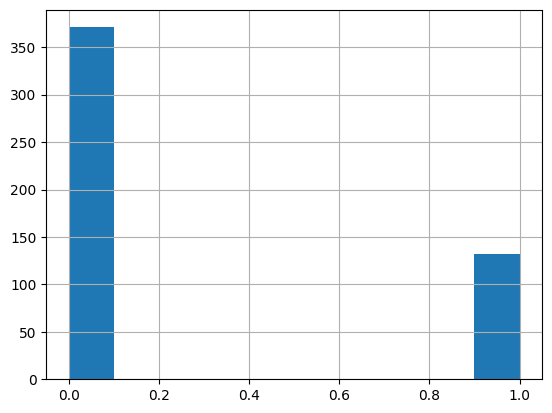

In [29]:
print(df_cleaned.shape)
df_cleaned['target'].hist()

## Best preprocessing

### For SMOTE

In [30]:
continuous_imputer_pipeline = Pipeline([('scaler', MinMaxScaler()), ('imputer', KNNImputer(n_neighbors=7))])
continuous_imputer_tree_pipeline = Pipeline([('imputer', KNNImputer(n_neighbors=7))])

categorical_imputer_pipeline = Pipeline([
    ('imputer', IterativeImputer(estimator=KNeighborsClassifier(n_neighbors=10, n_jobs=-1), max_iter=40, initial_strategy='most_frequent')),
    ])

### For training without SMOTE

In [31]:
continuous_preprocessor_tree = Pipeline([('imputer', KNNImputer(n_neighbors=7))])

continuous_preprocessor = Pipeline([('scaler', MinMaxScaler()), ('imputer', KNNImputer(n_neighbors=7))])
categorical_preprocessor = Pipeline([('imputer', IterativeImputer(estimator=KNeighborsClassifier(n_neighbors=10, n_jobs=-1), max_iter=40, initial_strategy='most_frequent')), ('one_hot_encoder', OneHotEncoder(handle_unknown='error', drop='if_binary'))])


preprocessor = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ('num', continuous_preprocessor, CONTINUOUS_ATTRIBUTES),
        ('cat', categorical_preprocessor, get_categorical_attributes_except(PCO))
    ])

## Hyperparameter tuning

### Decision Tree

In [32]:
model_tree = DecisionTreeClassifier()
param_grid_tree = {
    'model__criterion': ['gini'],
    'model__max_depth': [3, 4, 5],
    'model__min_samples_split': [7, 10],
    'model__min_samples_leaf': [7, 10],
    'model__class_weight': [None],
}

tree_h_scores = hyperparameter_tuning_general(X_train, y_train, 'target', model_tree, continuous_preprocessor_tree, categorical_preprocessor, param_grid_tree, scoring_metric='f1_weighted')

# tree_h_scores = hyperparameter_tuning_general(X_train, y_train, PCO, model_tree, continuous_preprocessor_tree, categorical_preprocessor, param_grid_tree, scoring_metric='f1_weighted')
tree_h_scores.sort_values(by='mean_test_score', ascending=False)

Fitting 15 folds for each of 12 candidates, totalling 180 fits
Best parameters: {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 10, 'model__min_samples_split': 7}
Best score (f1_weighted): 0.982369105166139


params  mean_train_score  mean_test_score
2    {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 10, 'model__min_samples_split': 7}          0.982441         0.982369
3   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 10, 'model__min_samples_split': 10}          0.982441         0.982369
6    {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 10, 'model__min_samples_split': 7}          0.982441         0.982369
7   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 10, 'model__min_samples_split': 10}          0.982441         0.982369
10   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 10, 'model__min_samples_split': 7}          0.982441         0.982369
11  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 10, 'model__min_samples_split': 10}          0.982441         0.982369
8     {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 7, 'model__min_samples_split': 7}          0.984399         0.976674
0     {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 7, 'model__min_samples_split': 7}          0.984399         0.974247
1    {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 7, 'model__min_samples_split': 10}          0.984399         0.974247
4     {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 7, 'model__min_samples_split': 7}          0.984399         0.974247
5    {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 7, 'model__min_samples_split': 10}          0.984399         0.974247
9    {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 7, 'model__min_samples_split': 10}          0.984399         0.974247

In [ ]:
# model = DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_leaf=2, min_samples_split=5, splitter='random')

# tuned_df = compare_random_states(X_train, y_train, model, PCO, continuous_preprocessor_tree, categorical_preprocessor)
# tuned_df.abs.sort_values(by='cv_score', ascending=False).head(5)

### Logistic Regression

Fitting 15 folds for each of 8 candidates, totalling 120 fits
Best parameters: {'model__C': 0.5}
Best score (f1_weighted): 0.9874220891844482


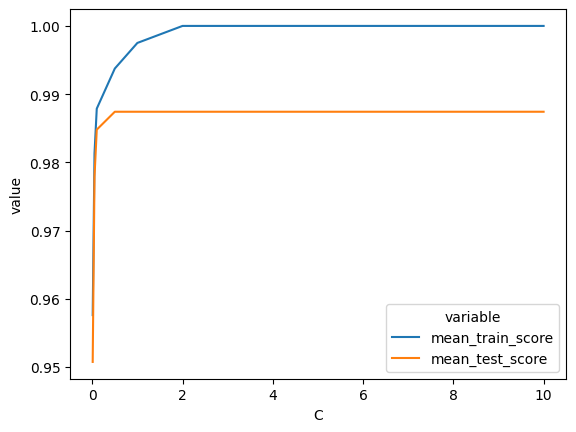

C  mean_train_score  mean_test_score
0  0.01          0.957619         0.950754
1  0.05          0.981313         0.977919
2   0.1          0.987876         0.984797
3   0.5          0.993755         0.987422
4     1          0.997507         0.987422
5     2          1.000000         0.987422
6     5          1.000000         0.987422
7    10          1.000000         0.987422

In [22]:



model_lr = LogisticRegression(multi_class='multinomial', max_iter=100000, n_jobs=-1)

param_grid_lr = {
    'model__C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10],
}

lr_h_scores = hyperparameter_tuning_linear(X_train, y_train, 'target', model_lr, continuous_preprocessor, categorical_preprocessor, param_grid_lr, main_parameter='C', scoring_metric='f1_weighted')
lr_h_scores

Selected C=1

### Random Forest

In [28]:
model_rf = RandomForestClassifier(n_jobs=-1)

param_grid_rf = {
    'model__criterion': ['gini'],
    'model__class_weight': ['balanced_subsample'],
    'model__n_estimators': [200],
    'model__max_features': ['sqrt'],
    'model__max_depth': [None],
    'model__min_samples_split': [5, 7, 10],
    'model__min_samples_leaf': [5, 7, 10],
}

rf_h_scores = hyperparameter_tuning_general(X_train, y_train, PCO, model_rf, continuous_preprocessor_tree, categorical_preprocessor, param_grid_rf, scoring_metric=gmean_scorer)

# rf_h_scores = hyperparameter_tuning_general(X_train, y_train, PCO, model_rf, continuous_preprocessor_tree, categorical_preprocessor, param_grid_rf, scoring_metric='f1_weighted')
rf_h_scores.sort_values(by='mean_test_score', ascending=False)

Fitting 15 folds for each of 9 candidates, totalling 135 fits
Best parameters: {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 10, 'model__min_samples_split': 5, 'model__n_estimators': 200}
Best score (make_scorer(geometric_mean_score, response_method='predict')): 0.5805880252581901


params  mean_train_score  mean_test_score
6   {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 10, 'model__min_samples_split': 5, 'model__n_estimators': 200}          0.974303         0.580588
8  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 10, 'model__min_samples_split': 10, 'model__n_estimators': 200}          0.972424         0.568267
7   {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 10, 'model__min_samples_split': 7, 'model__n_estimators': 200}          0.978751         0.558834
5   {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 10, 'model__n_estimators': 200}          0.986689         0.489028
3    {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 5, 'model__n_estimators': 200}          0.988773         0.482206
4    {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 7, 'model__n_estimators': 200}          0.990602         0.469087
0    {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__min_samples_split': 5, 'model__n_estimators': 200}          0.996879         0.450167
1    {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__min_samples_split': 7, 'model__n_estimators': 200}          0.996638         0.431238
2   {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__min_samples_split': 10, 'model__n_estimators': 200}          0.997072         0.406834

In [22]:
# model = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=None, max_features='sqrt', min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample')

# tuned_df = compare_random_states(X_train, y_train, model, PCO, continuous_preprocessor_tree, categorical_preprocessor)
# tuned_df.abs().sort_values(by='cv_score', ascending=False).head(5)

## Best models

### DecisionTree

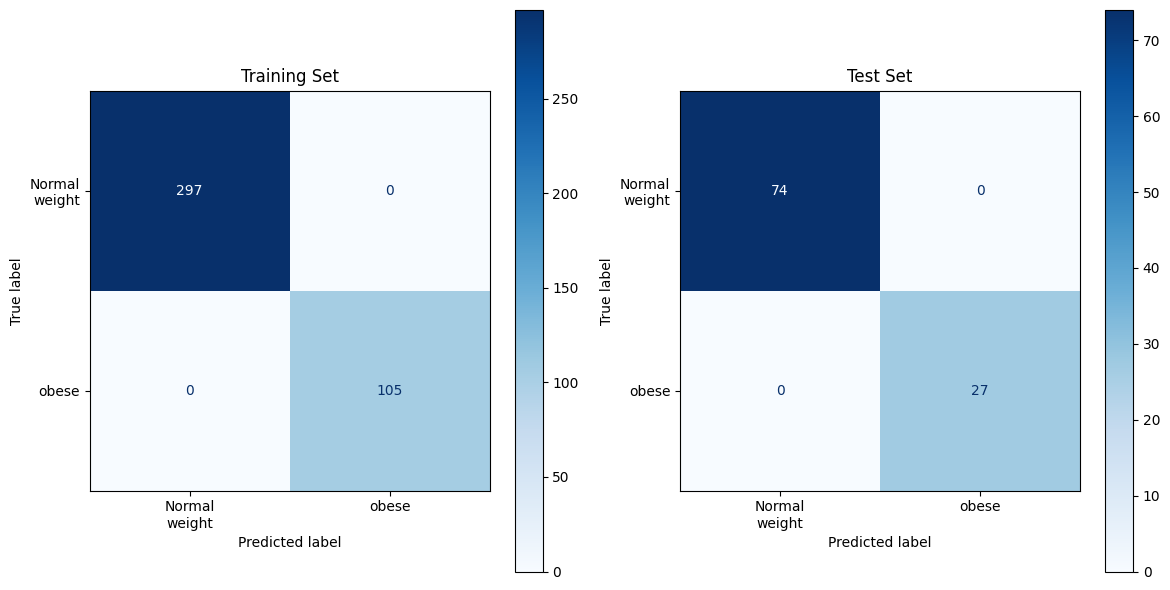

Training set
               precision    recall  f1-score   support

Normal
weight       1.00      1.00      1.00       297
        obese       1.00      1.00      1.00       105

     accuracy                           1.00       402
    macro avg       1.00      1.00      1.00       402
 weighted avg       1.00      1.00      1.00       402

Test set
               precision    recall  f1-score   support

Normal
weight       1.00      1.00      1.00        74
        obese       1.00      1.00      1.00        27

     accuracy                           1.00       101
    macro avg       1.00      1.00      1.00       101
 weighted avg       1.00      1.00      1.00       101



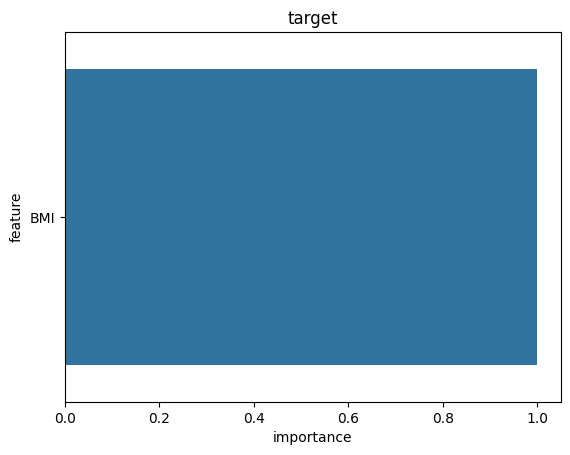

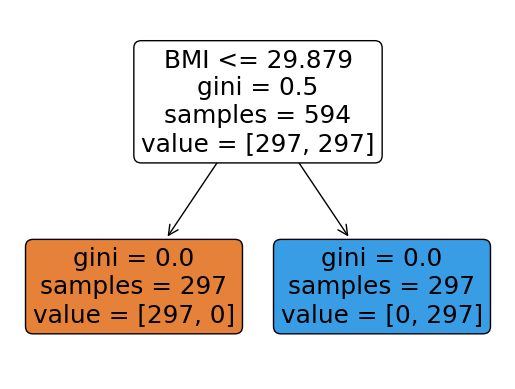

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


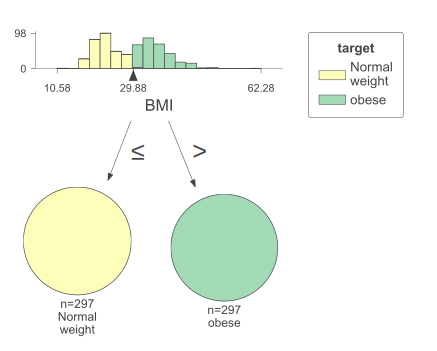

In [23]:
#  SMOTE
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=7, min_samples_split=7, class_weight=None)

feature_importnces_tree, pipeline_tree = validate_model_classification_smote(model_tree, 'target', CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_imputer_tree_pipeline, categorical_imputer_pipeline, get_feature_importance_tree)

plot_fancy_tree_smote(pipeline_tree, X_train, y_train, 'target', show_artificial_data=True, class_names=CLASS_NAMES)

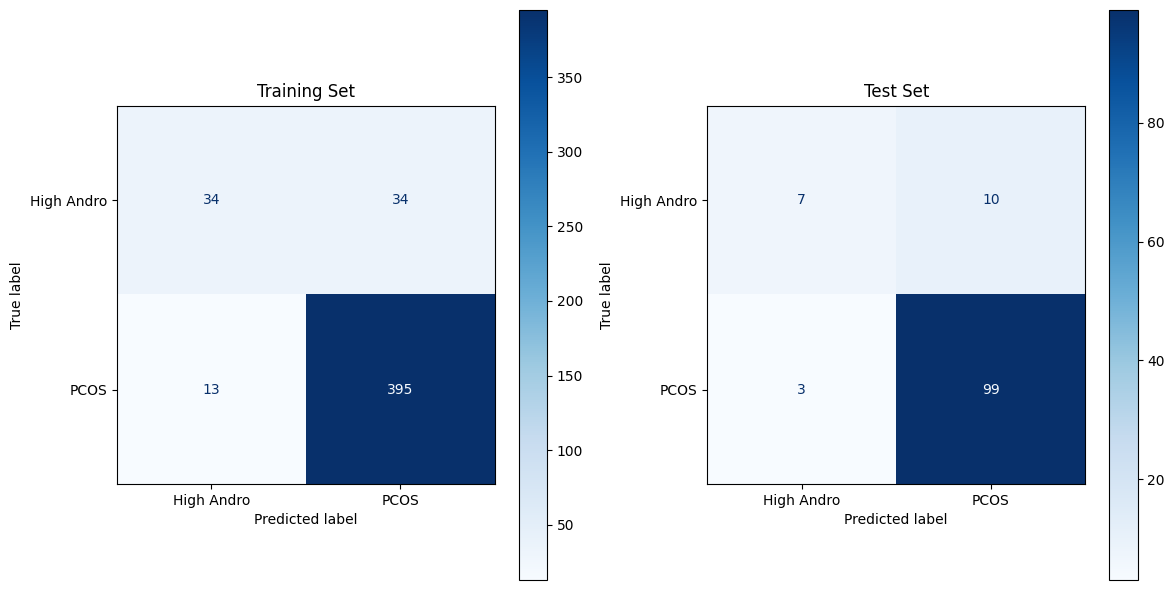

Training set
              precision    recall  f1-score   support

  High Andro       0.72      0.50      0.59        68
        PCOS       0.92      0.97      0.94       408

    accuracy                           0.90       476
   macro avg       0.82      0.73      0.77       476
weighted avg       0.89      0.90      0.89       476

Test set
              precision    recall  f1-score   support

  High Andro       0.70      0.41      0.52        17
        PCOS       0.91      0.97      0.94       102

    accuracy                           0.89       119
   macro avg       0.80      0.69      0.73       119
weighted avg       0.88      0.89      0.88       119



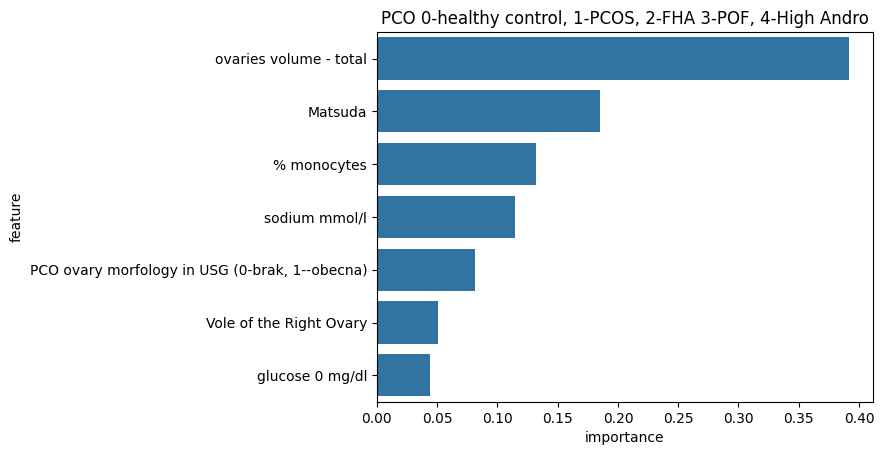

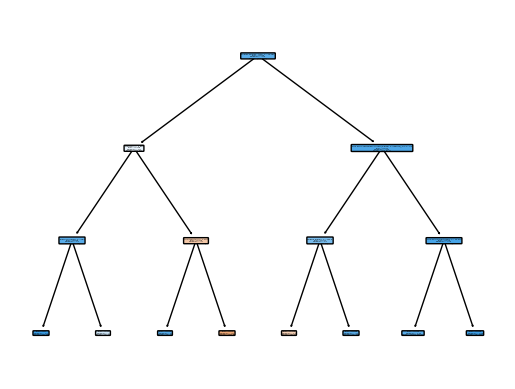

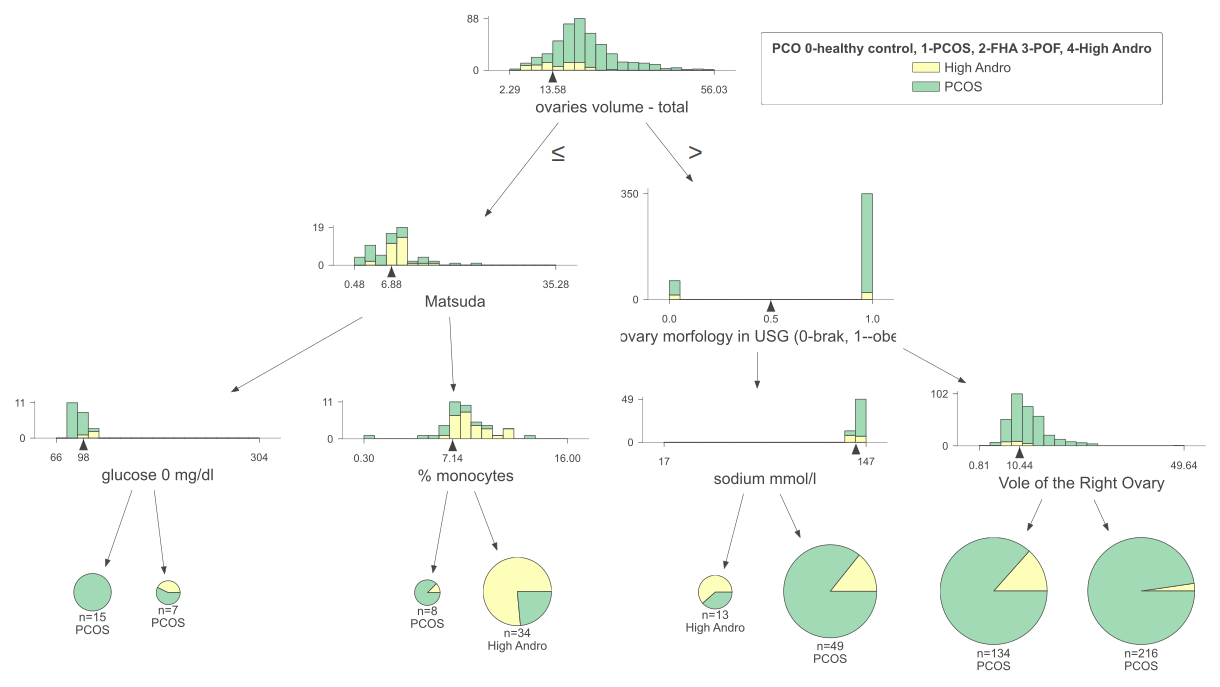

In [31]:
#  bez smote
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=7, min_samples_split=10, class_weight=None)

feature_importnces_tree, pipeline_tree = validate_model_classification(model_tree, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_preprocessor_tree, categorical_preprocessor, get_feature_importance_tree)

plot_fancy_tree(pipeline_tree, X_train, y_train, PCO, CLASS_NAMES)

### RandomForest

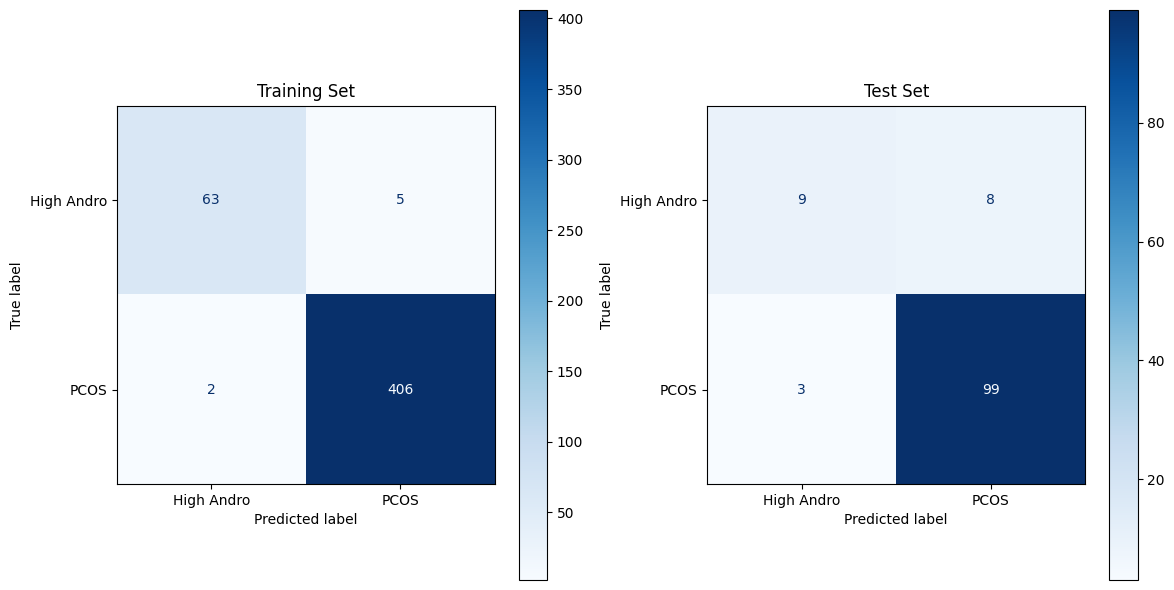

Training set
              precision    recall  f1-score   support

  High Andro       0.97      0.93      0.95        68
        PCOS       0.99      1.00      0.99       408

    accuracy                           0.99       476
   macro avg       0.98      0.96      0.97       476
weighted avg       0.99      0.99      0.99       476

Test set
              precision    recall  f1-score   support

  High Andro       0.75      0.53      0.62        17
        PCOS       0.93      0.97      0.95       102

    accuracy                           0.91       119
   macro avg       0.84      0.75      0.78       119
weighted avg       0.90      0.91      0.90       119



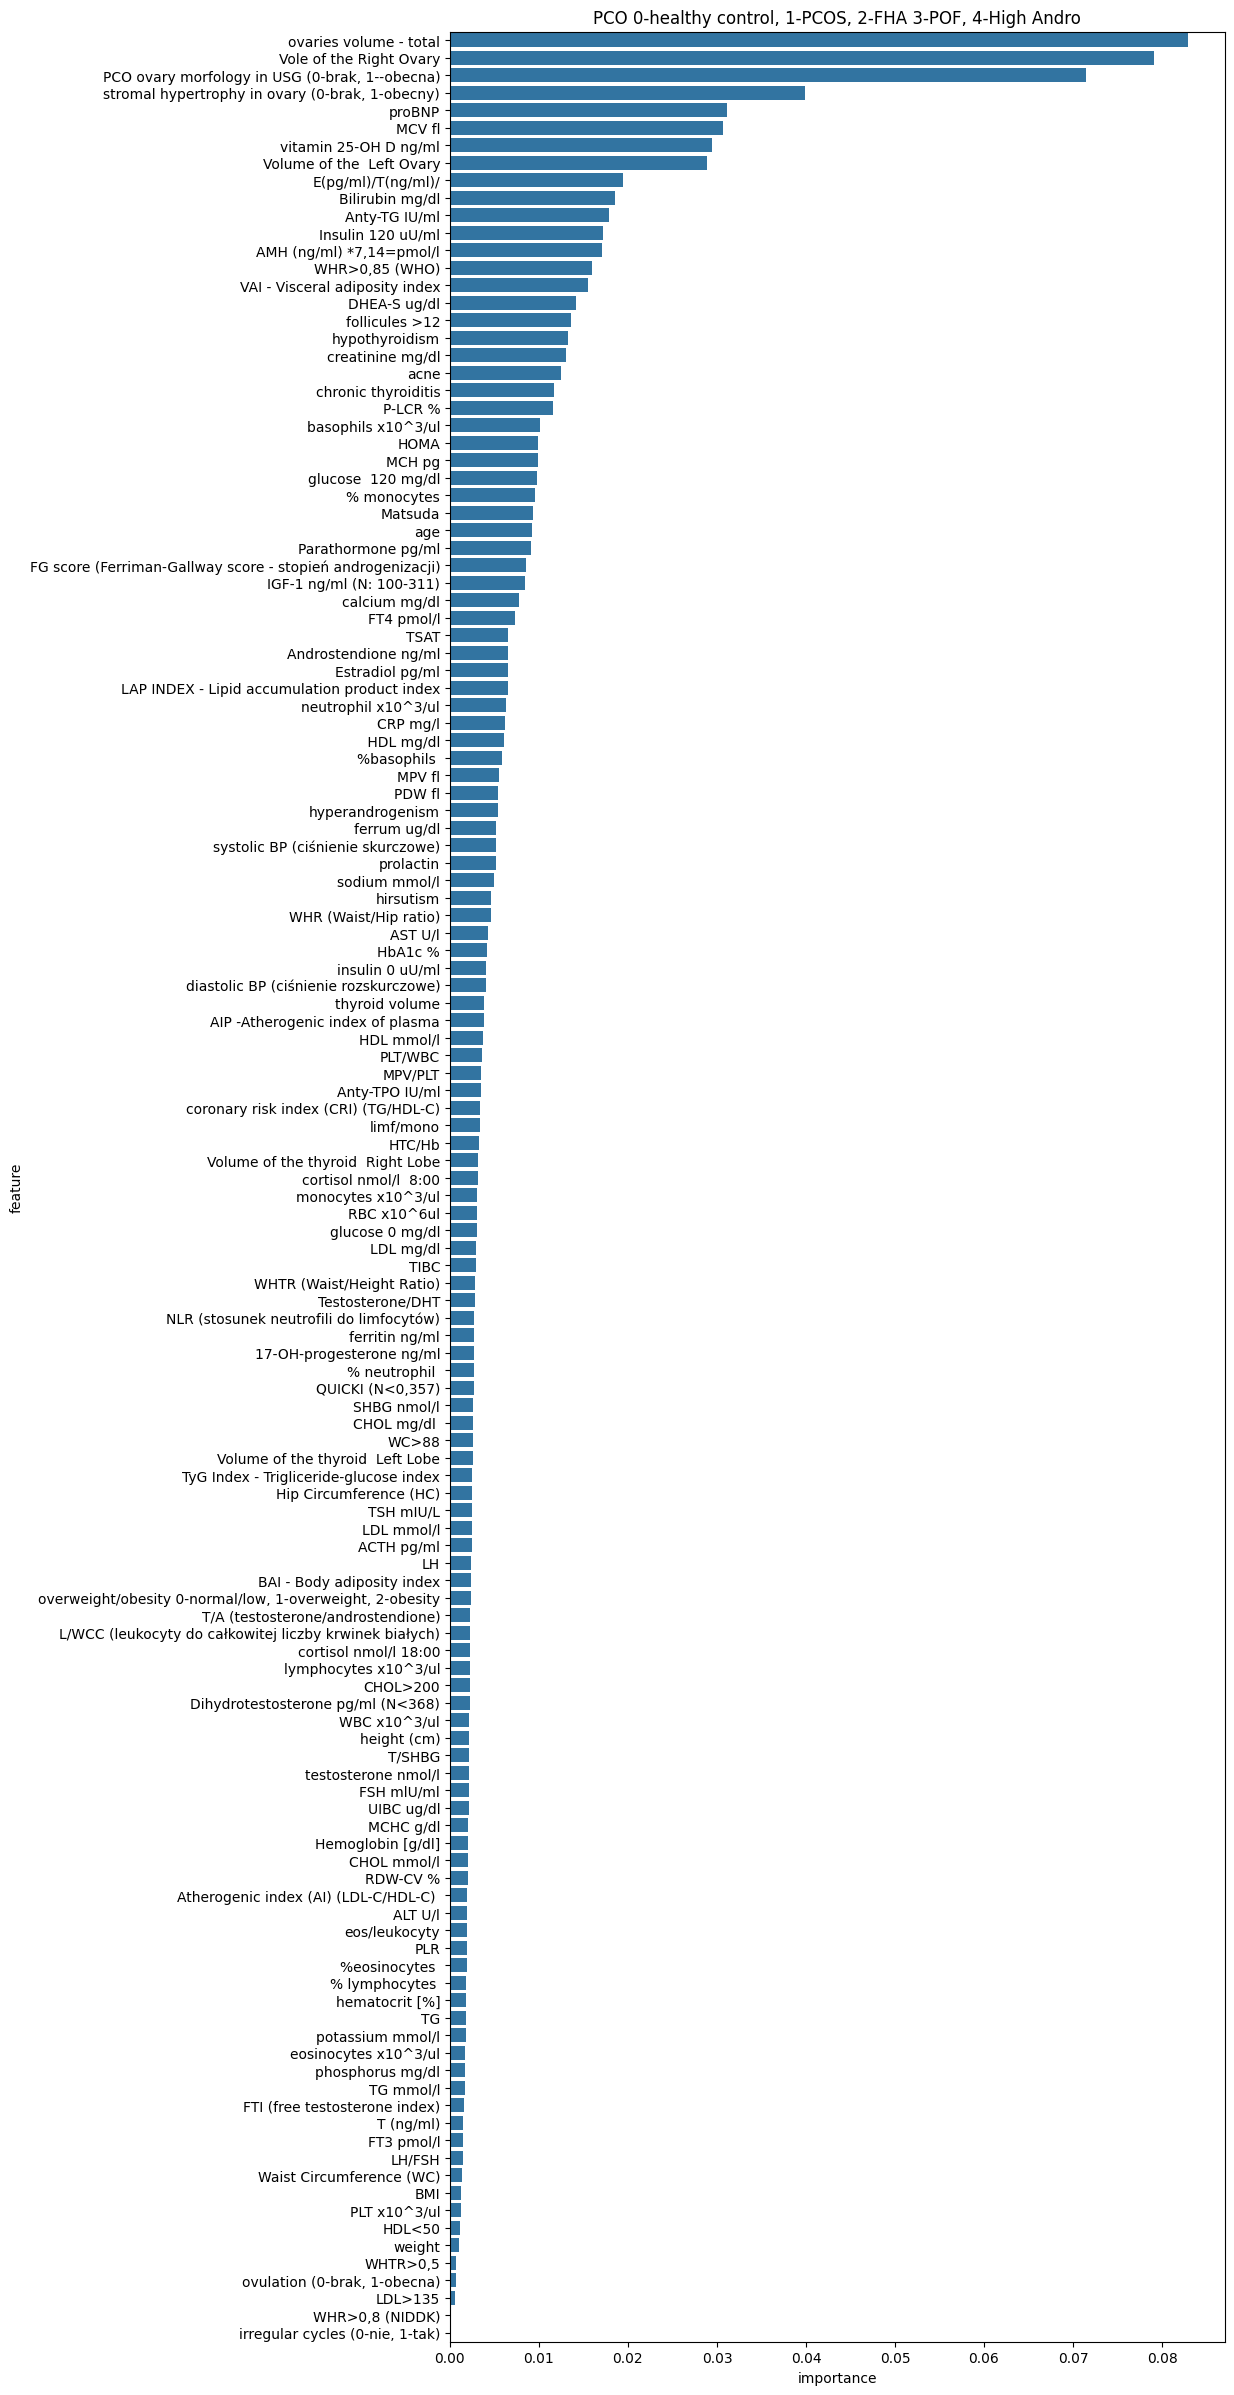

In [32]:
#  smote
model_rf = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=None, max_features='sqrt', min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample', random_state=72)

feature_importnces_tree, pipeline_tree = validate_model_classification_smote(model_rf, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_imputer_tree_pipeline, categorical_imputer_pipeline, get_feature_importance_rf)

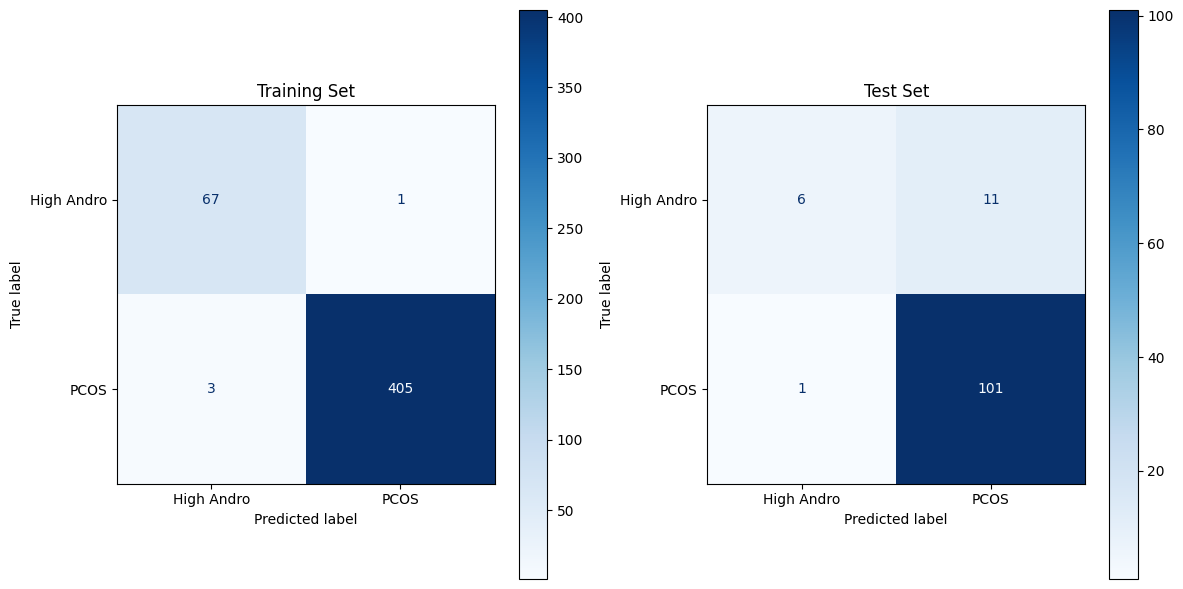

Training set
              precision    recall  f1-score   support

  High Andro       0.96      0.99      0.97        68
        PCOS       1.00      0.99      1.00       408

    accuracy                           0.99       476
   macro avg       0.98      0.99      0.98       476
weighted avg       0.99      0.99      0.99       476

Test set
              precision    recall  f1-score   support

  High Andro       0.86      0.35      0.50        17
        PCOS       0.90      0.99      0.94       102

    accuracy                           0.90       119
   macro avg       0.88      0.67      0.72       119
weighted avg       0.90      0.90      0.88       119



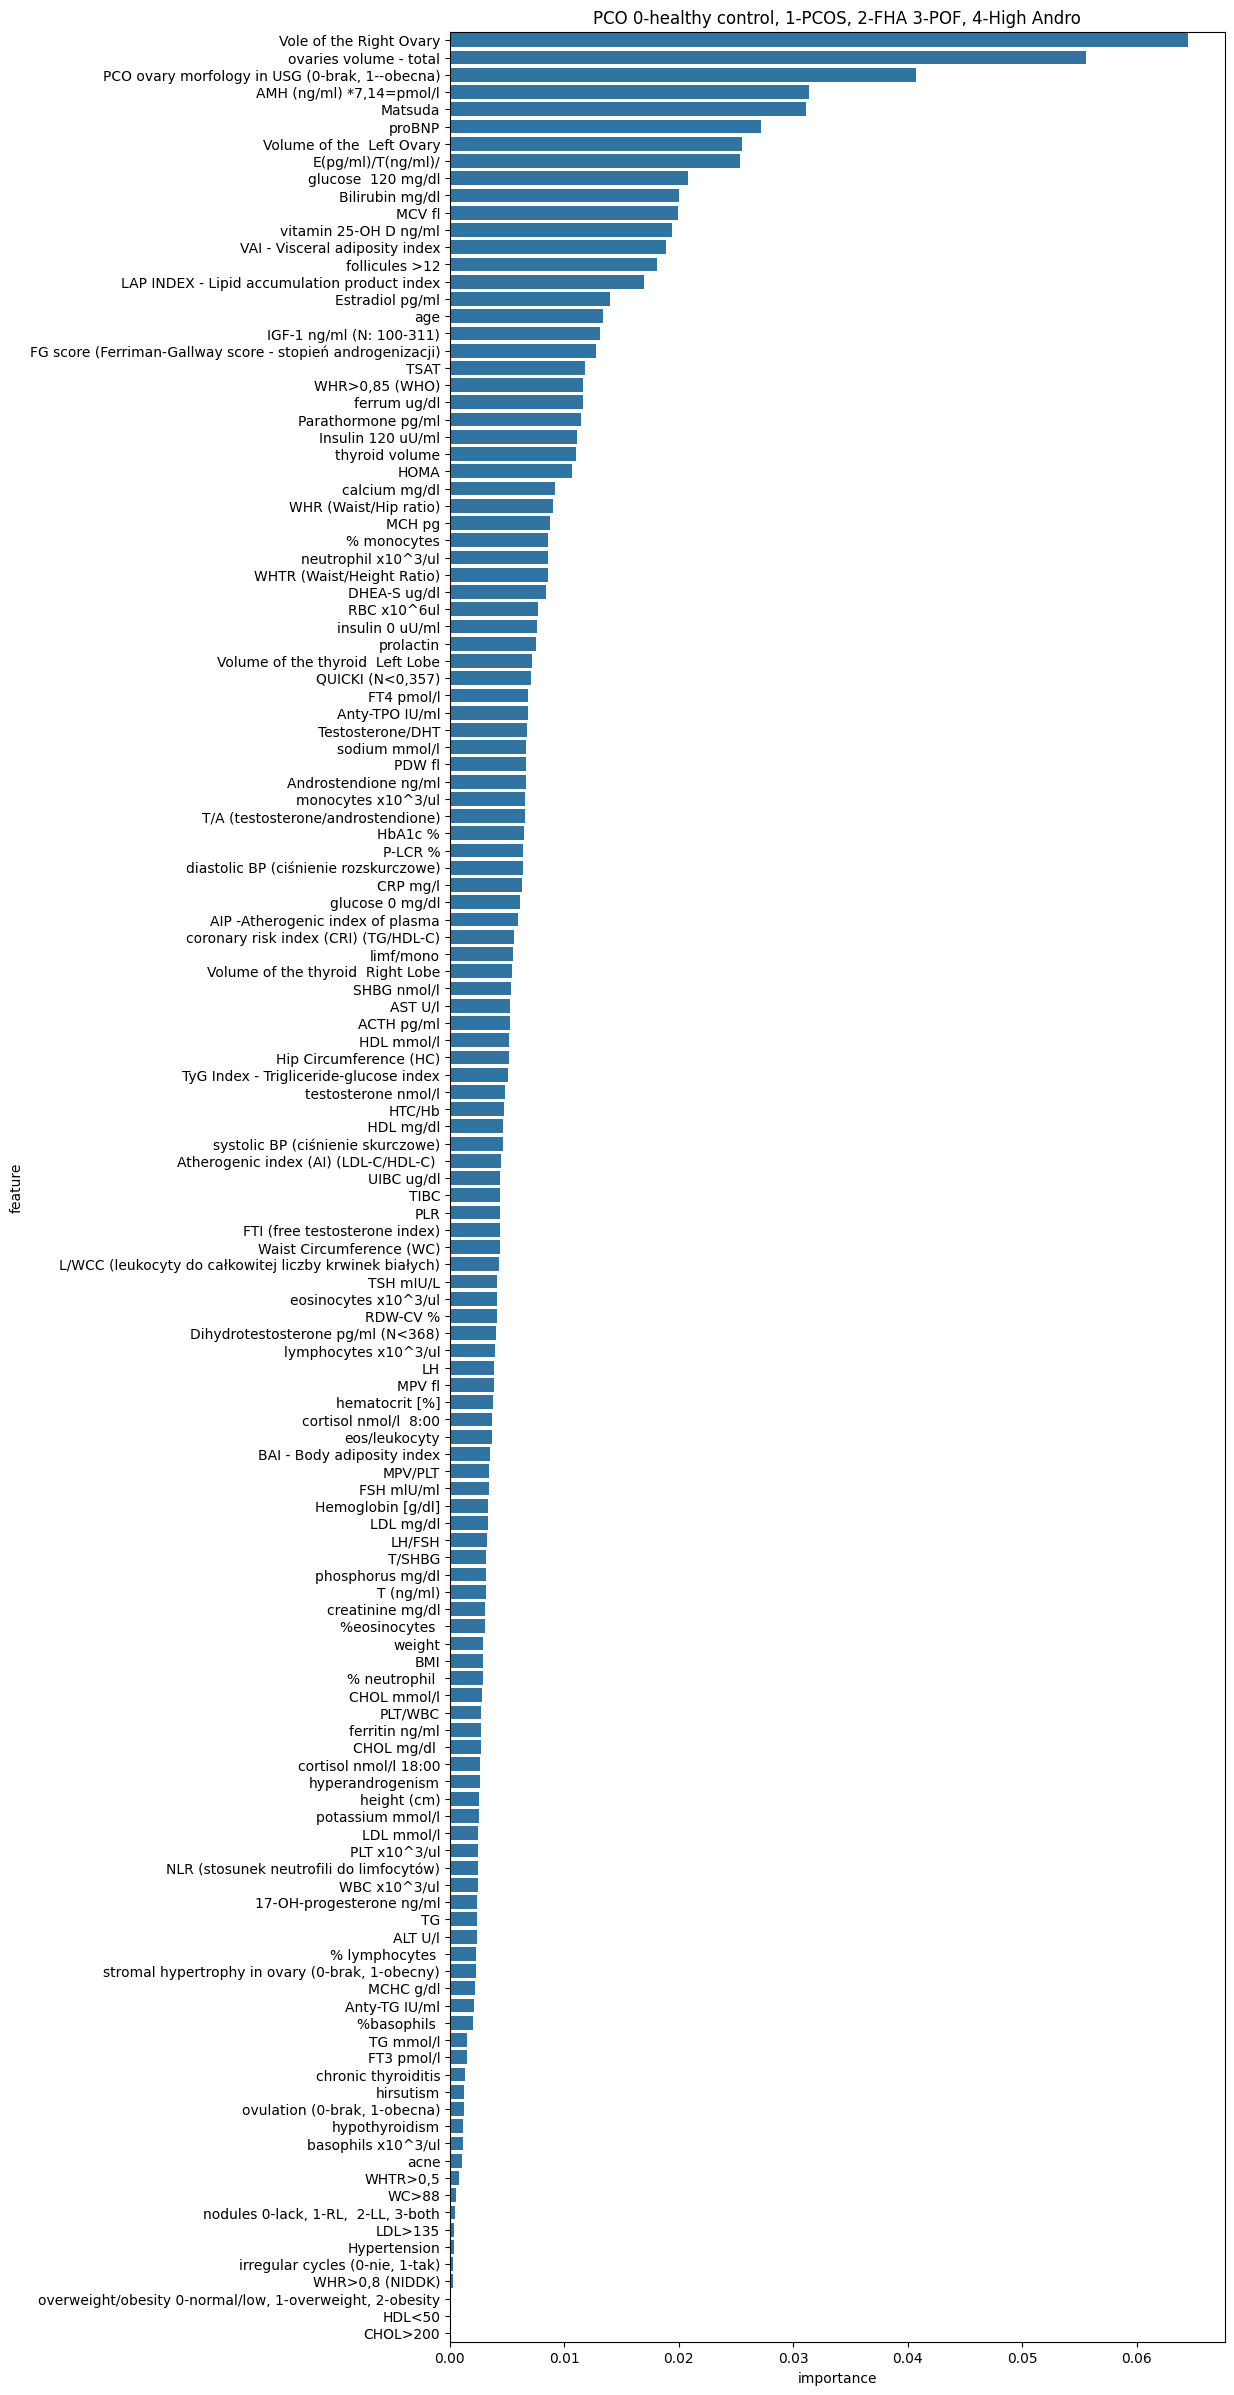

In [15]:
#  bez smote
model_rf = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=None, max_features='sqrt', min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample', random_state=72)

feature_importnces_rf, pipeline_rf = validate_model_classification(model_rf, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_preprocessor_tree, categorical_preprocessor, get_feature_importance_rf)

### Logistic Regression

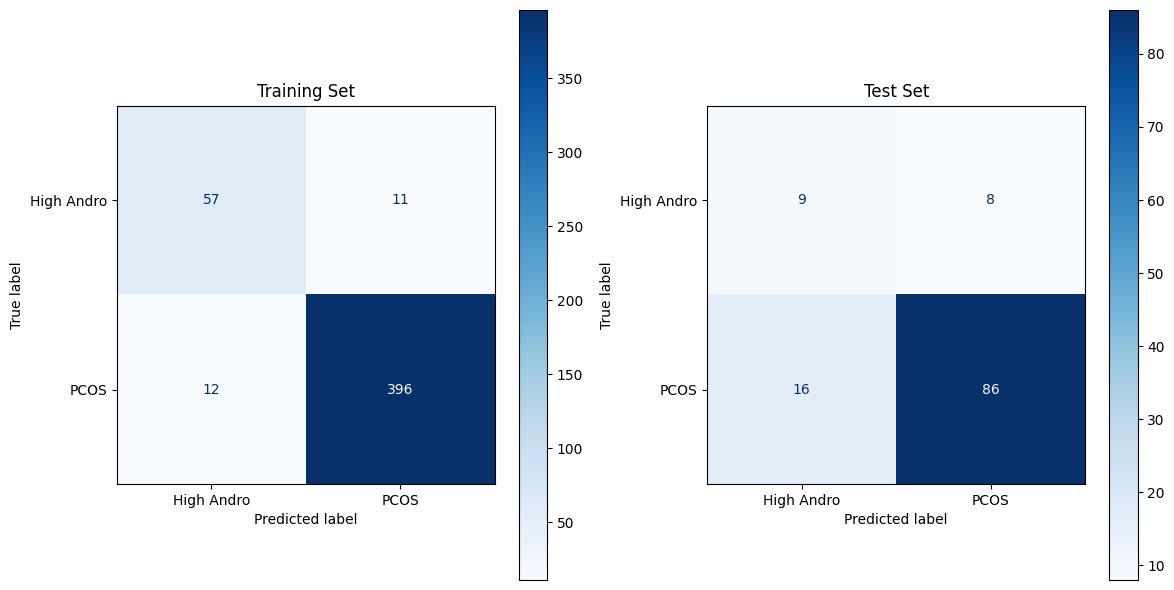

Training set
              precision    recall  f1-score   support

  High Andro       0.83      0.84      0.83        68
        PCOS       0.97      0.97      0.97       408

    accuracy                           0.95       476
   macro avg       0.90      0.90      0.90       476
weighted avg       0.95      0.95      0.95       476

Test set
              precision    recall  f1-score   support

  High Andro       0.36      0.53      0.43        17
        PCOS       0.91      0.84      0.88       102

    accuracy                           0.80       119
   macro avg       0.64      0.69      0.65       119
weighted avg       0.84      0.80      0.81       119



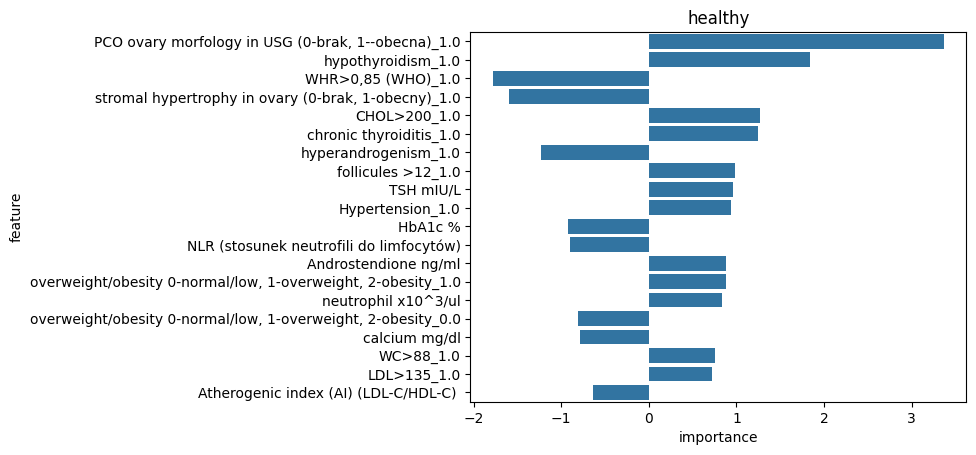

In [33]:
#  smote
model_lr = LogisticRegression(C=1, max_iter=100000, n_jobs=-1)

feature_importnces_lr, pipeline_tlr  = validate_model_classification_smote(model_lr, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_imputer_tree_pipeline, categorical_imputer_pipeline, get_feature_importance_logistic_regressison)

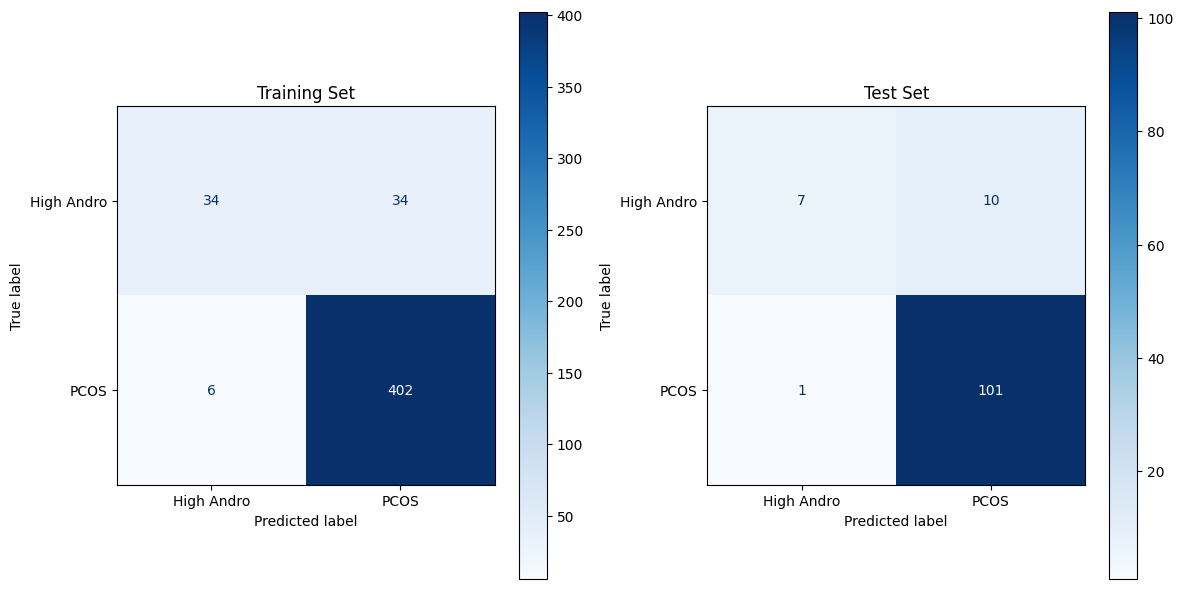

Training set
              precision    recall  f1-score   support

  High Andro       0.85      0.50      0.63        68
        PCOS       0.92      0.99      0.95       408

    accuracy                           0.92       476
   macro avg       0.89      0.74      0.79       476
weighted avg       0.91      0.92      0.91       476

Test set
              precision    recall  f1-score   support

  High Andro       0.88      0.41      0.56        17
        PCOS       0.91      0.99      0.95       102

    accuracy                           0.91       119
   macro avg       0.89      0.70      0.75       119
weighted avg       0.90      0.91      0.89       119



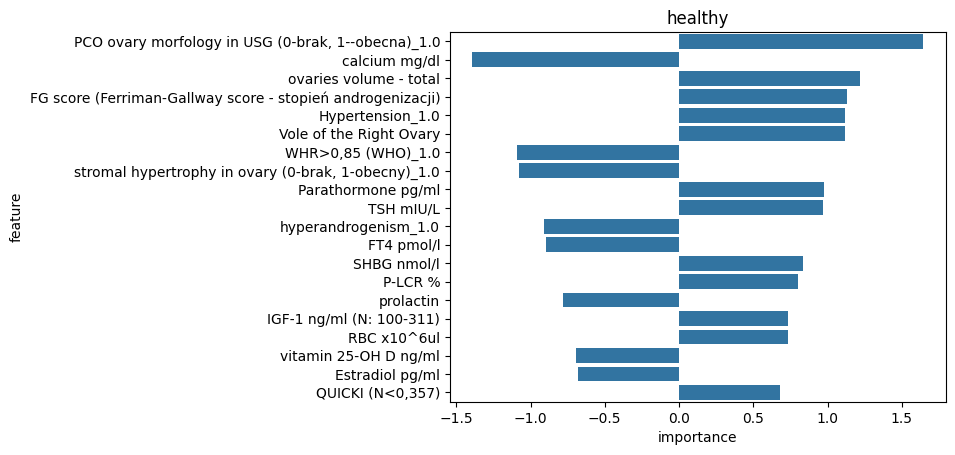

In [34]:
model_lr = LogisticRegression(C=1, max_iter=100000, n_jobs=-1)

feature_importnces_lr, pipeline_tlr = validate_model_classification(model_lr, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_preprocessor, categorical_preprocessor, get_feature_importance_logistic_regressison)

## Feature importance

In [35]:
selected_features_map = {}

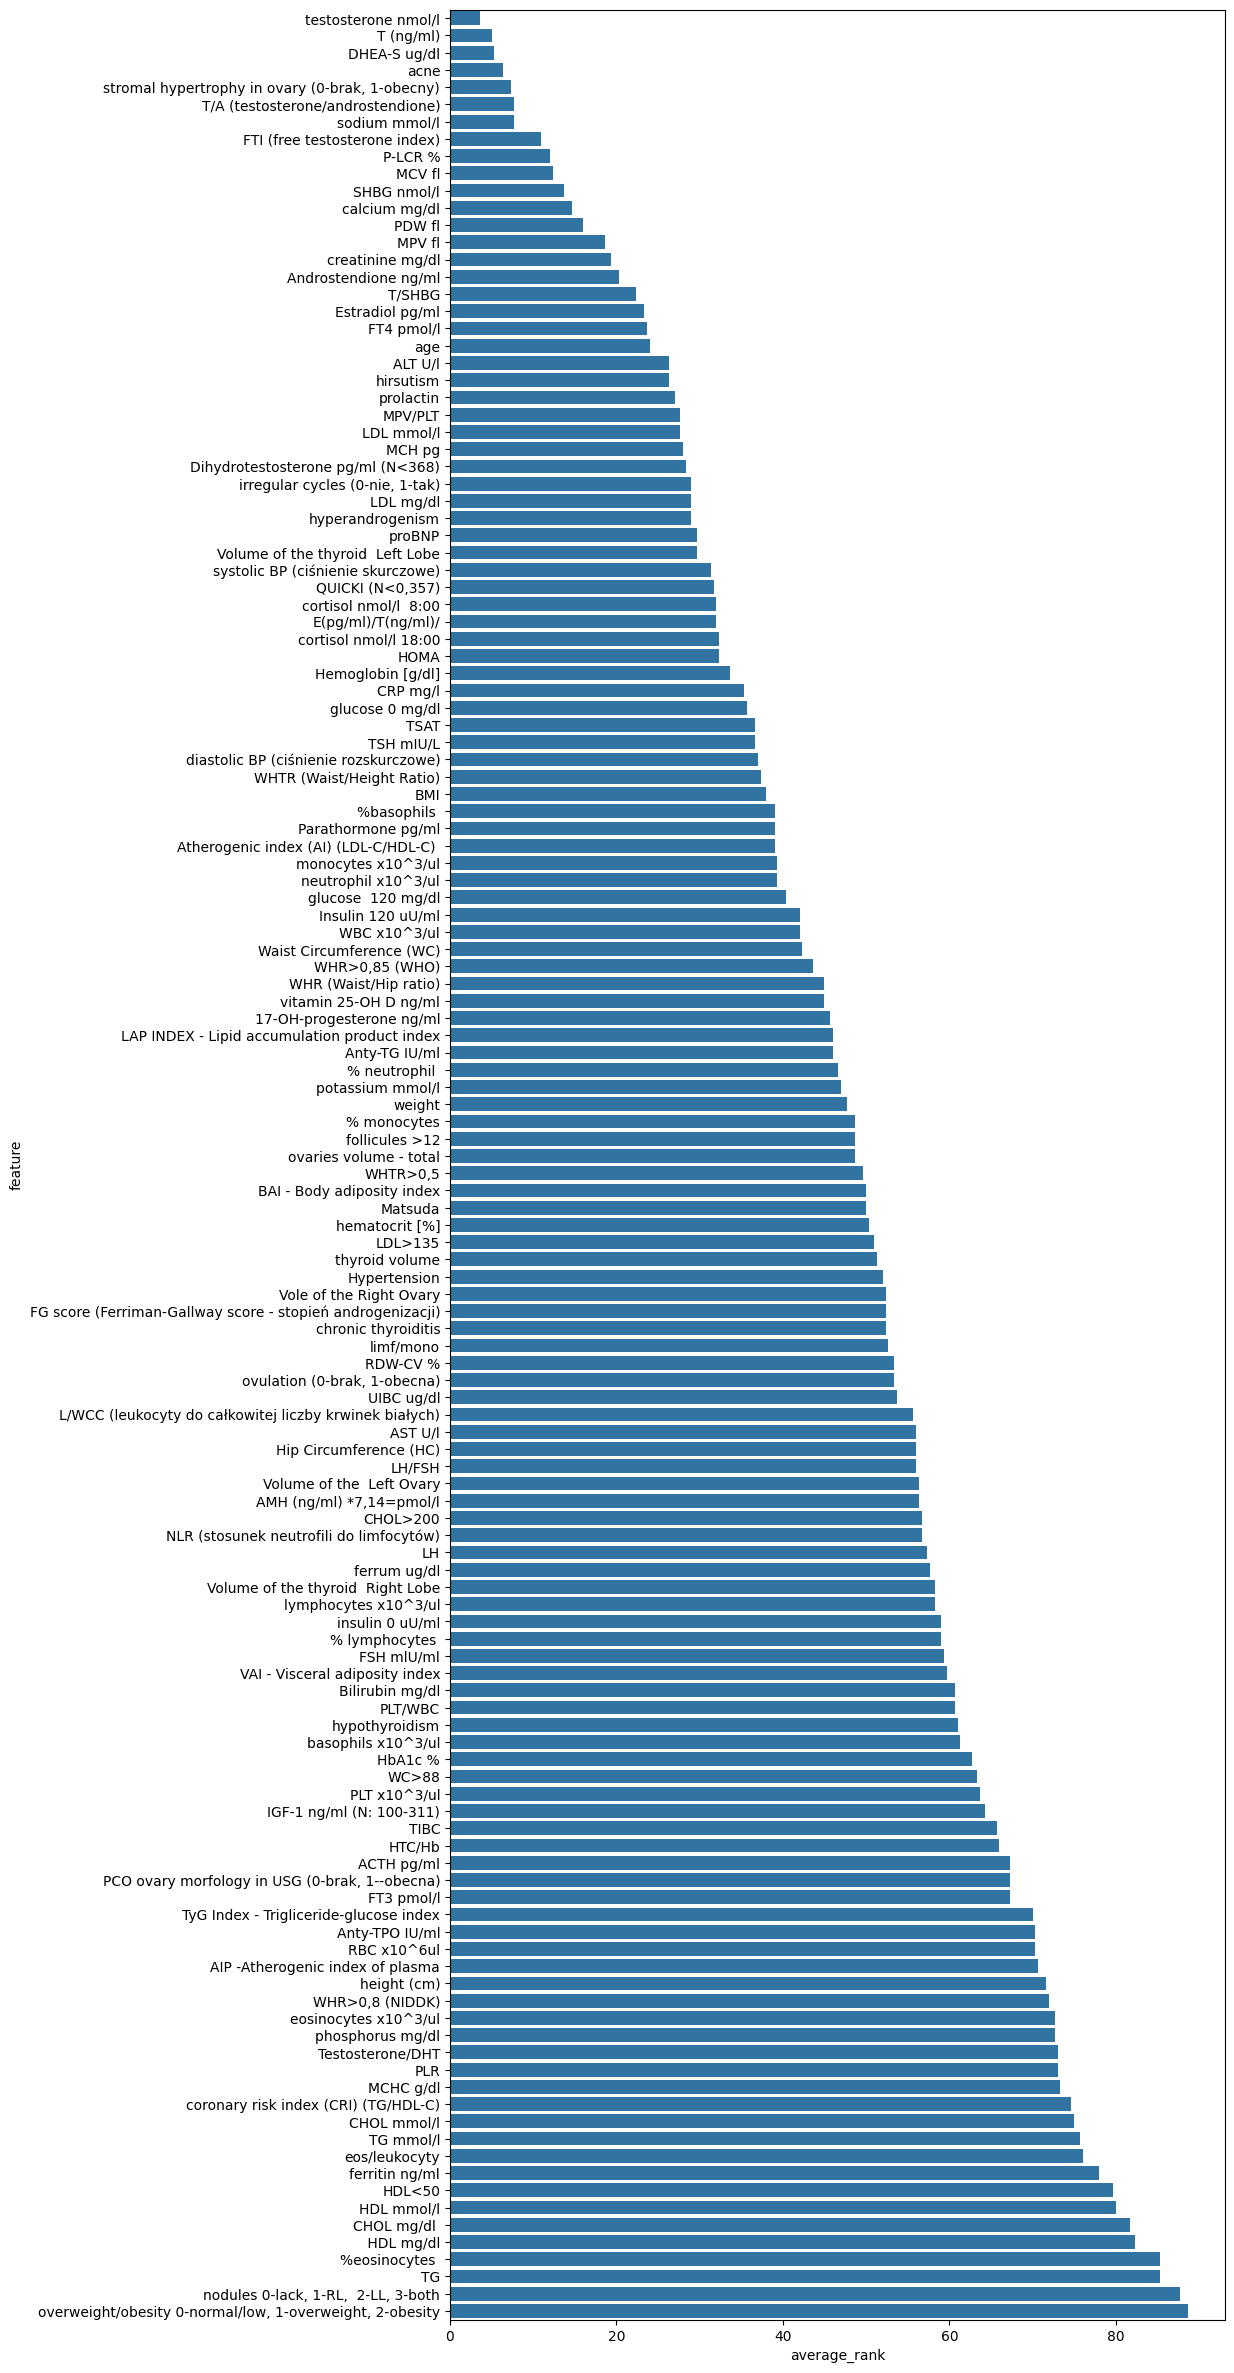

In [13]:
rename_importnace_col(feature_importnces_lr, 'logistic regression')
rename_importnace_col(feature_importnces_tree, 'tree')
rename_importnace_col(feature_importnces_rf, 'random forest')

feature_importance_df = merge_feature_importances([feature_importnces_lr, feature_importnces_tree, feature_importnces_rf])
ranked_df = rank_importances(feature_importance_df)

ranked_df_sorted = ranked_df.sort_values(by='average_rank')


plt.figure(figsize=(10, 30))
sns.barplot(ranked_df_sorted, x="average_rank", y="feature")
plt.show()

In [14]:
overall_rank_top_features = ranked_df_sorted[ranked_df_sorted['average_rank'] < 40] # a cut found on the plot above
overall_rank_selected_features = list(overall_rank_top_features['feature'].values)

selected_features_map['average_rank'] = overall_rank_selected_features
print(f'Top {len(overall_rank_selected_features)} features:')
overall_rank_selected_features

Top 51 features:


['testosterone nmol/l',
 'T (ng/ml)',
 'DHEA-S ug/dl',
 'acne',
 'stromal hypertrophy in ovary (0-brak, 1-obecny)',
 'T/A (testosterone/androstendione)',
 'sodium mmol/l',
 'FTI (free testosterone index)',
 'P-LCR %',
 'MCV fl',
 'SHBG nmol/l',
 'calcium mg/dl',
 'PDW fl',
 'MPV fl',
 'creatinine mg/dl',
 'Androstendione ng/ml',
 'T/SHBG',
 'Estradiol pg/ml',
 'FT4 pmol/l',
 'age',
 'ALT U/l',
 'hirsutism',
 'prolactin',
 'MPV/PLT',
 'LDL mmol/l',
 'MCH pg',
 'Dihydrotestosterone pg/ml (N<368)',
 'irregular cycles (0-nie, 1-tak)',
 'LDL mg/dl',
 'hyperandrogenism',
 'proBNP',
 'Volume of the thyroid  Left Lobe',
 'systolic BP (ciśnienie skurczowe)',
 'QUICKI (N<0,357)',
 'cortisol nmol/l  8:00',
 'E(pg/ml)/T(ng/ml)/',
 'cortisol nmol/l 18:00',
 'HOMA',
 'Hemoglobin [g/dl]',
 'CRP mg/l',
 'glucose 0 mg/dl',
 'TSAT',
 'TSH mIU/L',
 'diastolic BP (ciśnienie rozskurczowe)',
 'WHTR (Waist/Height Ratio)',
 'BMI',
 '%basophils ',
 'Parathormone pg/ml',
 'Atherogenic index (AI) (LDL-C/HDL-C) '

## Feature selection

### Chi 2

Selected 28 features


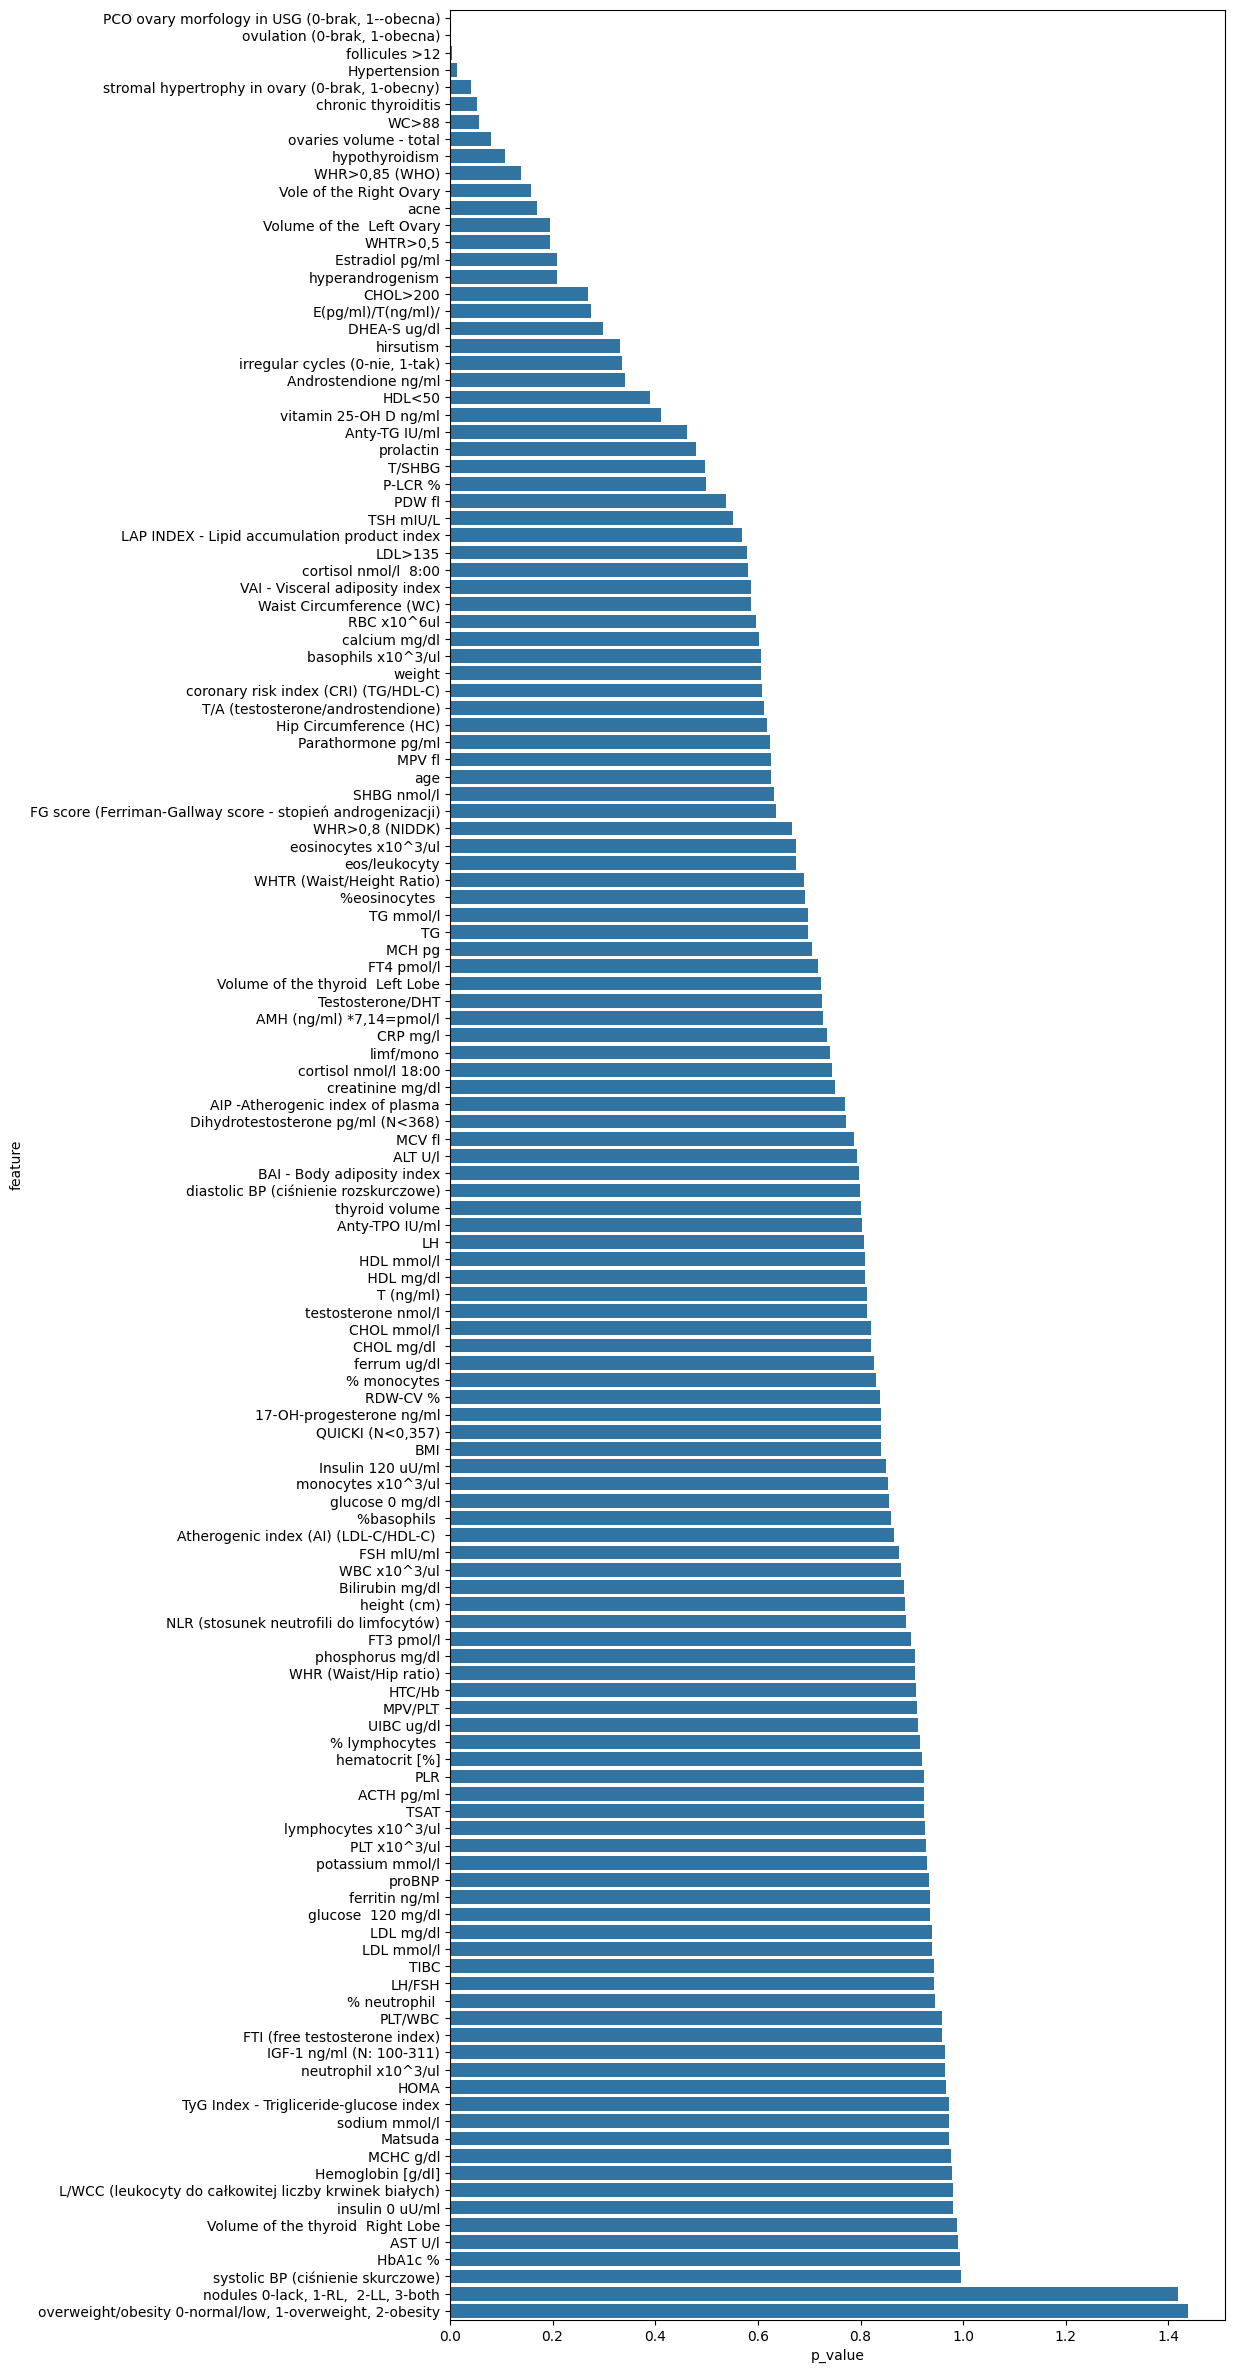

['PCO ovary morfology in USG (0-brak, 1--obecna)',
 'ovulation (0-brak, 1-obecna)',
 'follicules >12',
 'Hypertension',
 'stromal hypertrophy in ovary (0-brak, 1-obecny)',
 'chronic thyroiditis',
 'WC>88',
 'ovaries volume - total',
 'hypothyroidism',
 'WHR>0,85 (WHO)',
 'Vole of the Right Ovary',
 'acne',
 'Volume of the  Left Ovary',
 'WHTR>0,5',
 'Estradiol pg/ml',
 'hyperandrogenism',
 'CHOL>200',
 'E(pg/ml)/T(ng/ml)/',
 'DHEA-S ug/dl',
 'hirsutism',
 'irregular cycles (0-nie, 1-tak)',
 'Androstendione ng/ml',
 'HDL<50',
 'vitamin 25-OH D ng/ml',
 'Anty-TG IU/ml',
 'prolactin',
 'T/SHBG',
 'P-LCR %']

In [36]:
selected_features_chi2 = feature_selection_chi2(SelectKBest(chi2, k=15), PCO, continuous_preprocessor, categorical_preprocessor, X_train, y_train, threshold=0.5)
selected_features_map['chi_2'] = selected_features_chi2
selected_features_chi2

### Mutual info

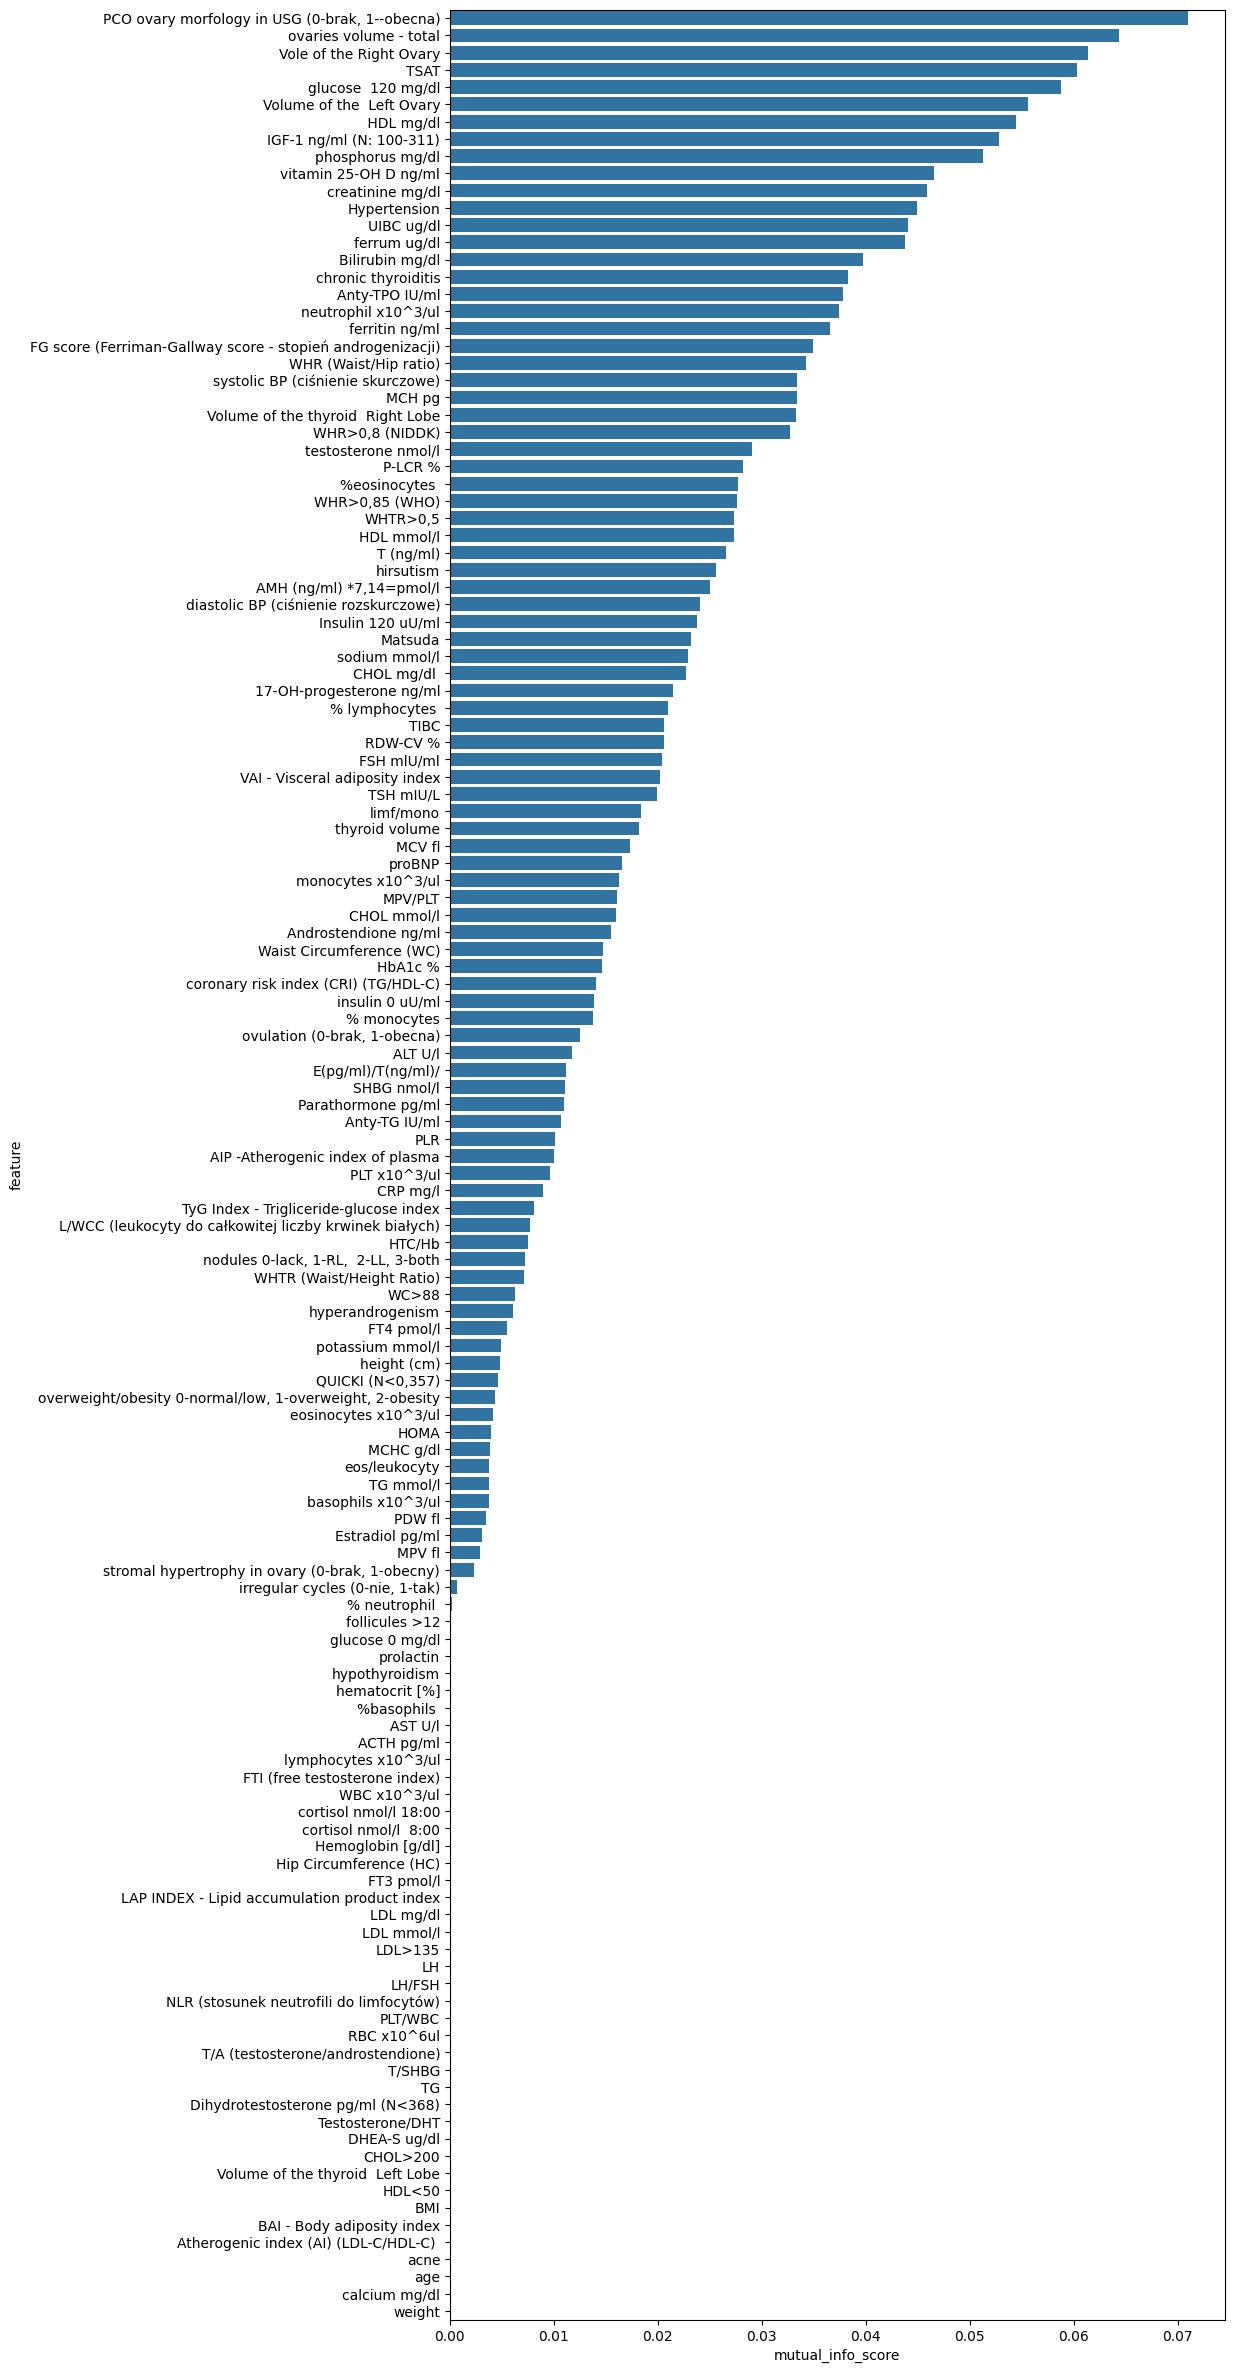

Selected 77 features


In [37]:
selected_feature_names_mutual_info = feature_selection_mutual_info_classification(X_train, y_train, PCO, continuous_preprocessor, categorical_preprocessor)
selected_feature_names_mutual_info = selected_feature_names_mutual_info[selected_feature_names_mutual_info['mutual_info_score'] > 0.005]

selected_feature_names_mutual_info.reset_index(drop=True, inplace=True)
print(f'Selected {len(selected_feature_names_mutual_info)} features')
selected_features_map['mutual_info'] = list(selected_feature_names_mutual_info['feature'].values)
# selected_feature_names_mutual_info

### Recursive Feature elimination

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.


Optimal number of features: 83


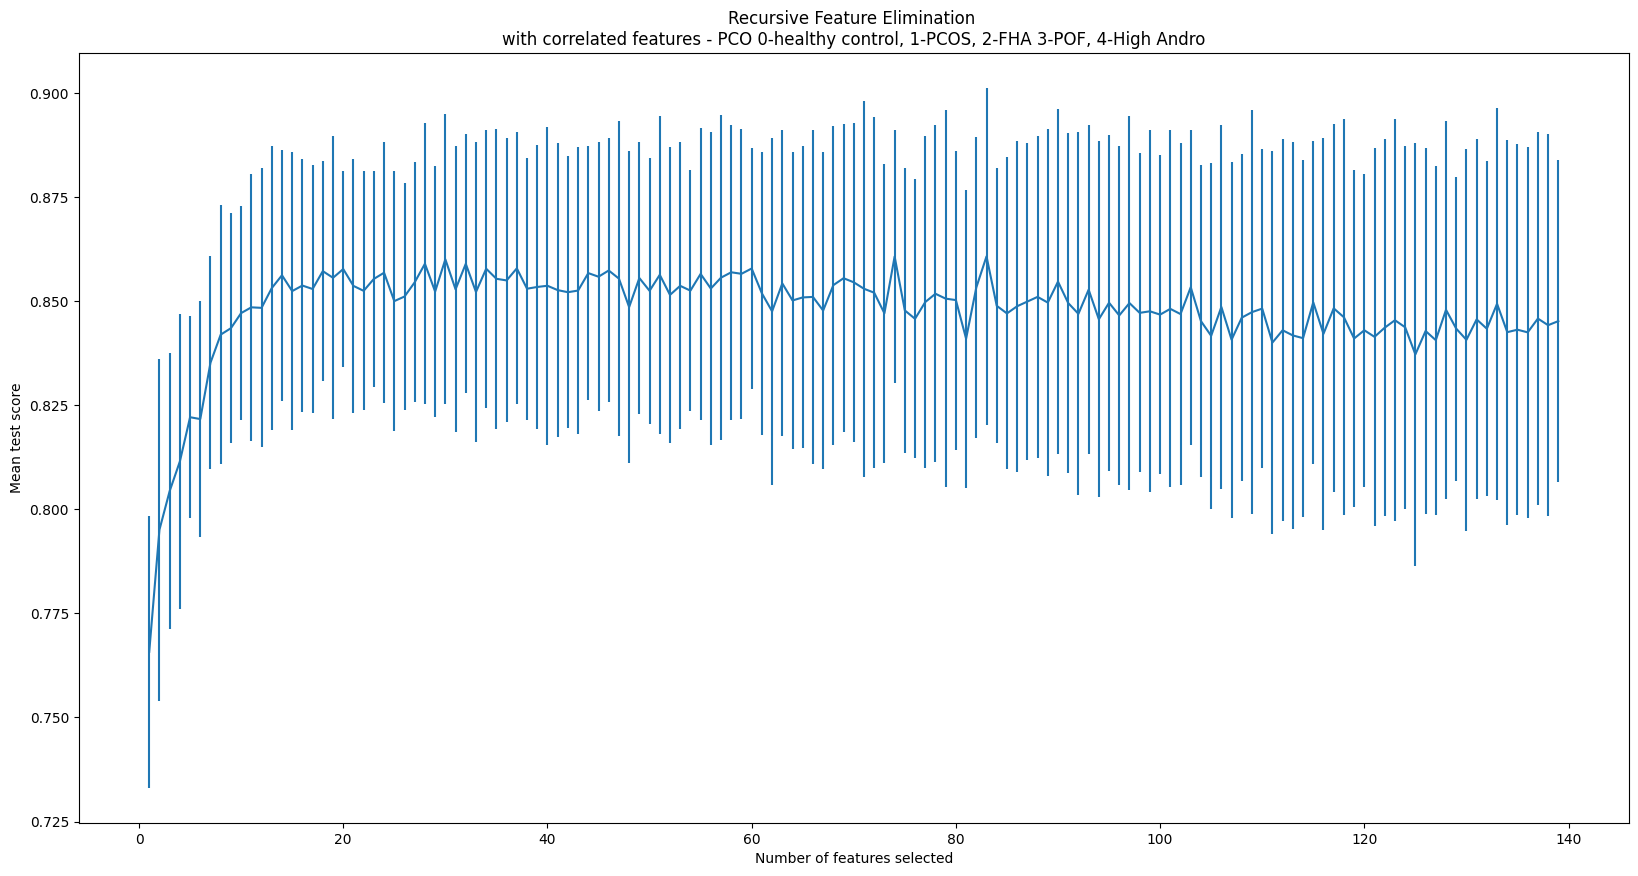

[' HDL mg/dl',
 'WBC x10^3/ul',
 'Volume of the thyroid  Right Lobe',
 'Volume of the thyroid  Left Lobe',
 'Volume of the  Left Ovary',
 'Vole of the Right Ovary',
 'VAI - Visceral adiposity index',
 'UIBC ug/dl',
 'TyG Index - Trigliceride-glucose index',
 'Testosterone/DHT',
 'TSH mIU/L',
 'TSAT',
 'TIBC',
 'TG',
 'T/A (testosterone/androstendione)',
 'T (ng/ml)',
 'vitamin 25-OH D ng/ml',
 'RBC x10^6ul',
 'QUICKI (N<0,357)',
 'Parathormone pg/ml',
 'PLT x10^3/ul',
 'PLR',
 'PDW fl',
 'PCO ovary morfology in USG (0-brak, 1--obecna)',
 'WHR (Waist/Hip ratio)',
 'WHR>0,85 (WHO)',
 'WHTR (Waist/Height Ratio)',
 'age',
 'thyroid volume',
 'systolic BP (ciśnienie skurczowe)',
 'sodium mmol/l',
 'prolactin',
 'proBNP',
 'potassium mmol/l',
 'phosphorus mg/dl',
 'ovaries volume - total',
 'neutrophil x10^3/ul',
 'monocytes x10^3/ul',
 'limf/mono',
 'P-LCR %',
 'insulin 0 uU/ml',
 'glucose  120 mg/dl',
 'follicules >12',
 'ferrum ug/dl',
 'ferritin ng/ml',
 'eos/leukocyty',
 'diastolic BP (

In [38]:
lasso_model = RandomForestClassifier(min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample')

recursive_feature_elimination_ranked_features_lasso = recursive_feature_elimination(X_train, y_train, lasso_model, PCO, continuous_preprocessor, categorical_preprocessor, scoring_metric='f1_weighted')
selected_features_map['recursive_feature_elimination'] = list(recursive_feature_elimination_ranked_features_lasso[recursive_feature_elimination_ranked_features_lasso['ranking'] == 1]['feature'].values)
selected_features_map['recursive_feature_elimination']

Selected 132 features


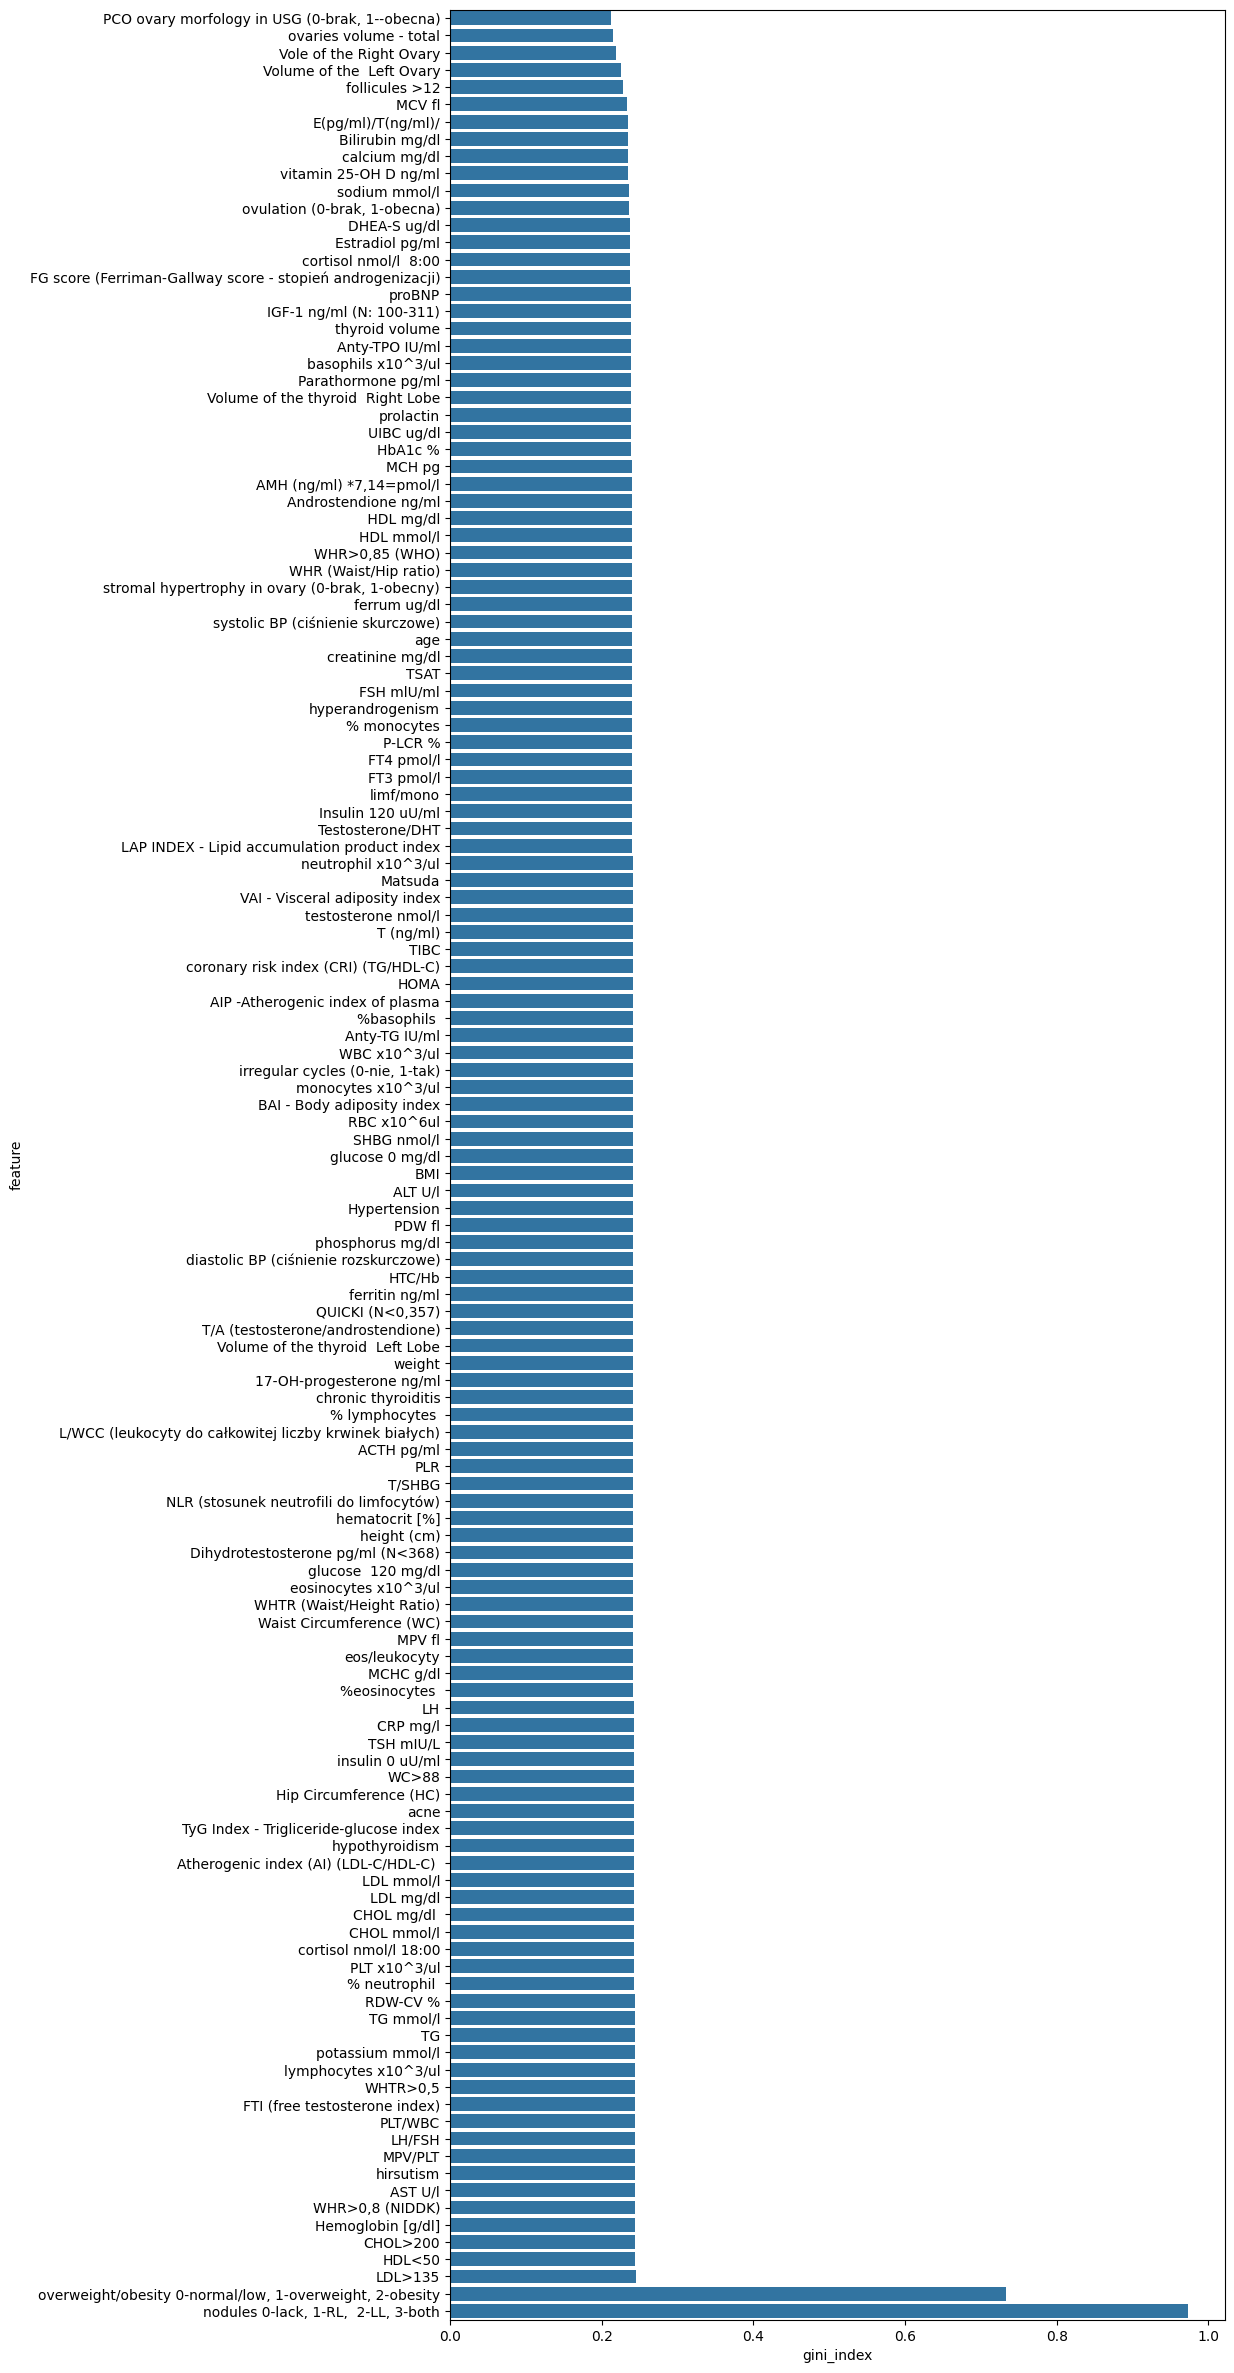

['PCO ovary morfology in USG (0-brak, 1--obecna)',
 'ovaries volume - total',
 'Vole of the Right Ovary',
 'Volume of the  Left Ovary',
 'follicules >12',
 'MCV fl',
 'E(pg/ml)/T(ng/ml)/',
 'Bilirubin mg/dl',
 'calcium mg/dl',
 'vitamin 25-OH D ng/ml',
 'sodium mmol/l',
 'ovulation (0-brak, 1-obecna)',
 'DHEA-S ug/dl',
 'Estradiol pg/ml',
 'cortisol nmol/l  8:00',
 'FG score (Ferriman-Gallway score - stopień androgenizacji)',
 'proBNP',
 'IGF-1 ng/ml (N: 100-311)',
 'thyroid volume',
 'Anty-TPO IU/ml',
 'basophils x10^3/ul',
 'Parathormone pg/ml',
 'Volume of the thyroid  Right Lobe',
 'prolactin',
 'UIBC ug/dl',
 'HbA1c %',
 'MCH pg',
 'AMH (ng/ml) *7,14=pmol/l',
 'Androstendione ng/ml',
 ' HDL mg/dl',
 'HDL mmol/l',
 'WHR>0,85 (WHO)',
 'WHR (Waist/Hip ratio)',
 'stromal hypertrophy in ovary (0-brak, 1-obecny)',
 'ferrum ug/dl',
 'systolic BP (ciśnienie skurczowe)',
 'age',
 'creatinine mg/dl',
 'TSAT',
 'FSH mlU/ml',
 'hyperandrogenism',
 '% monocytes',
 'P-LCR %',
 'FT4 pmol/l',
 'F

In [39]:
threshold = 0.5
gini_index_selected_features = feature_selection_gini_index(PCO, continuous_preprocessor, categorical_preprocessor, X_train, y_train, threshold=threshold)

selected_features_map['permutation_importance'] = gini_index_selected_features
gini_index_selected_features

selected 120 features


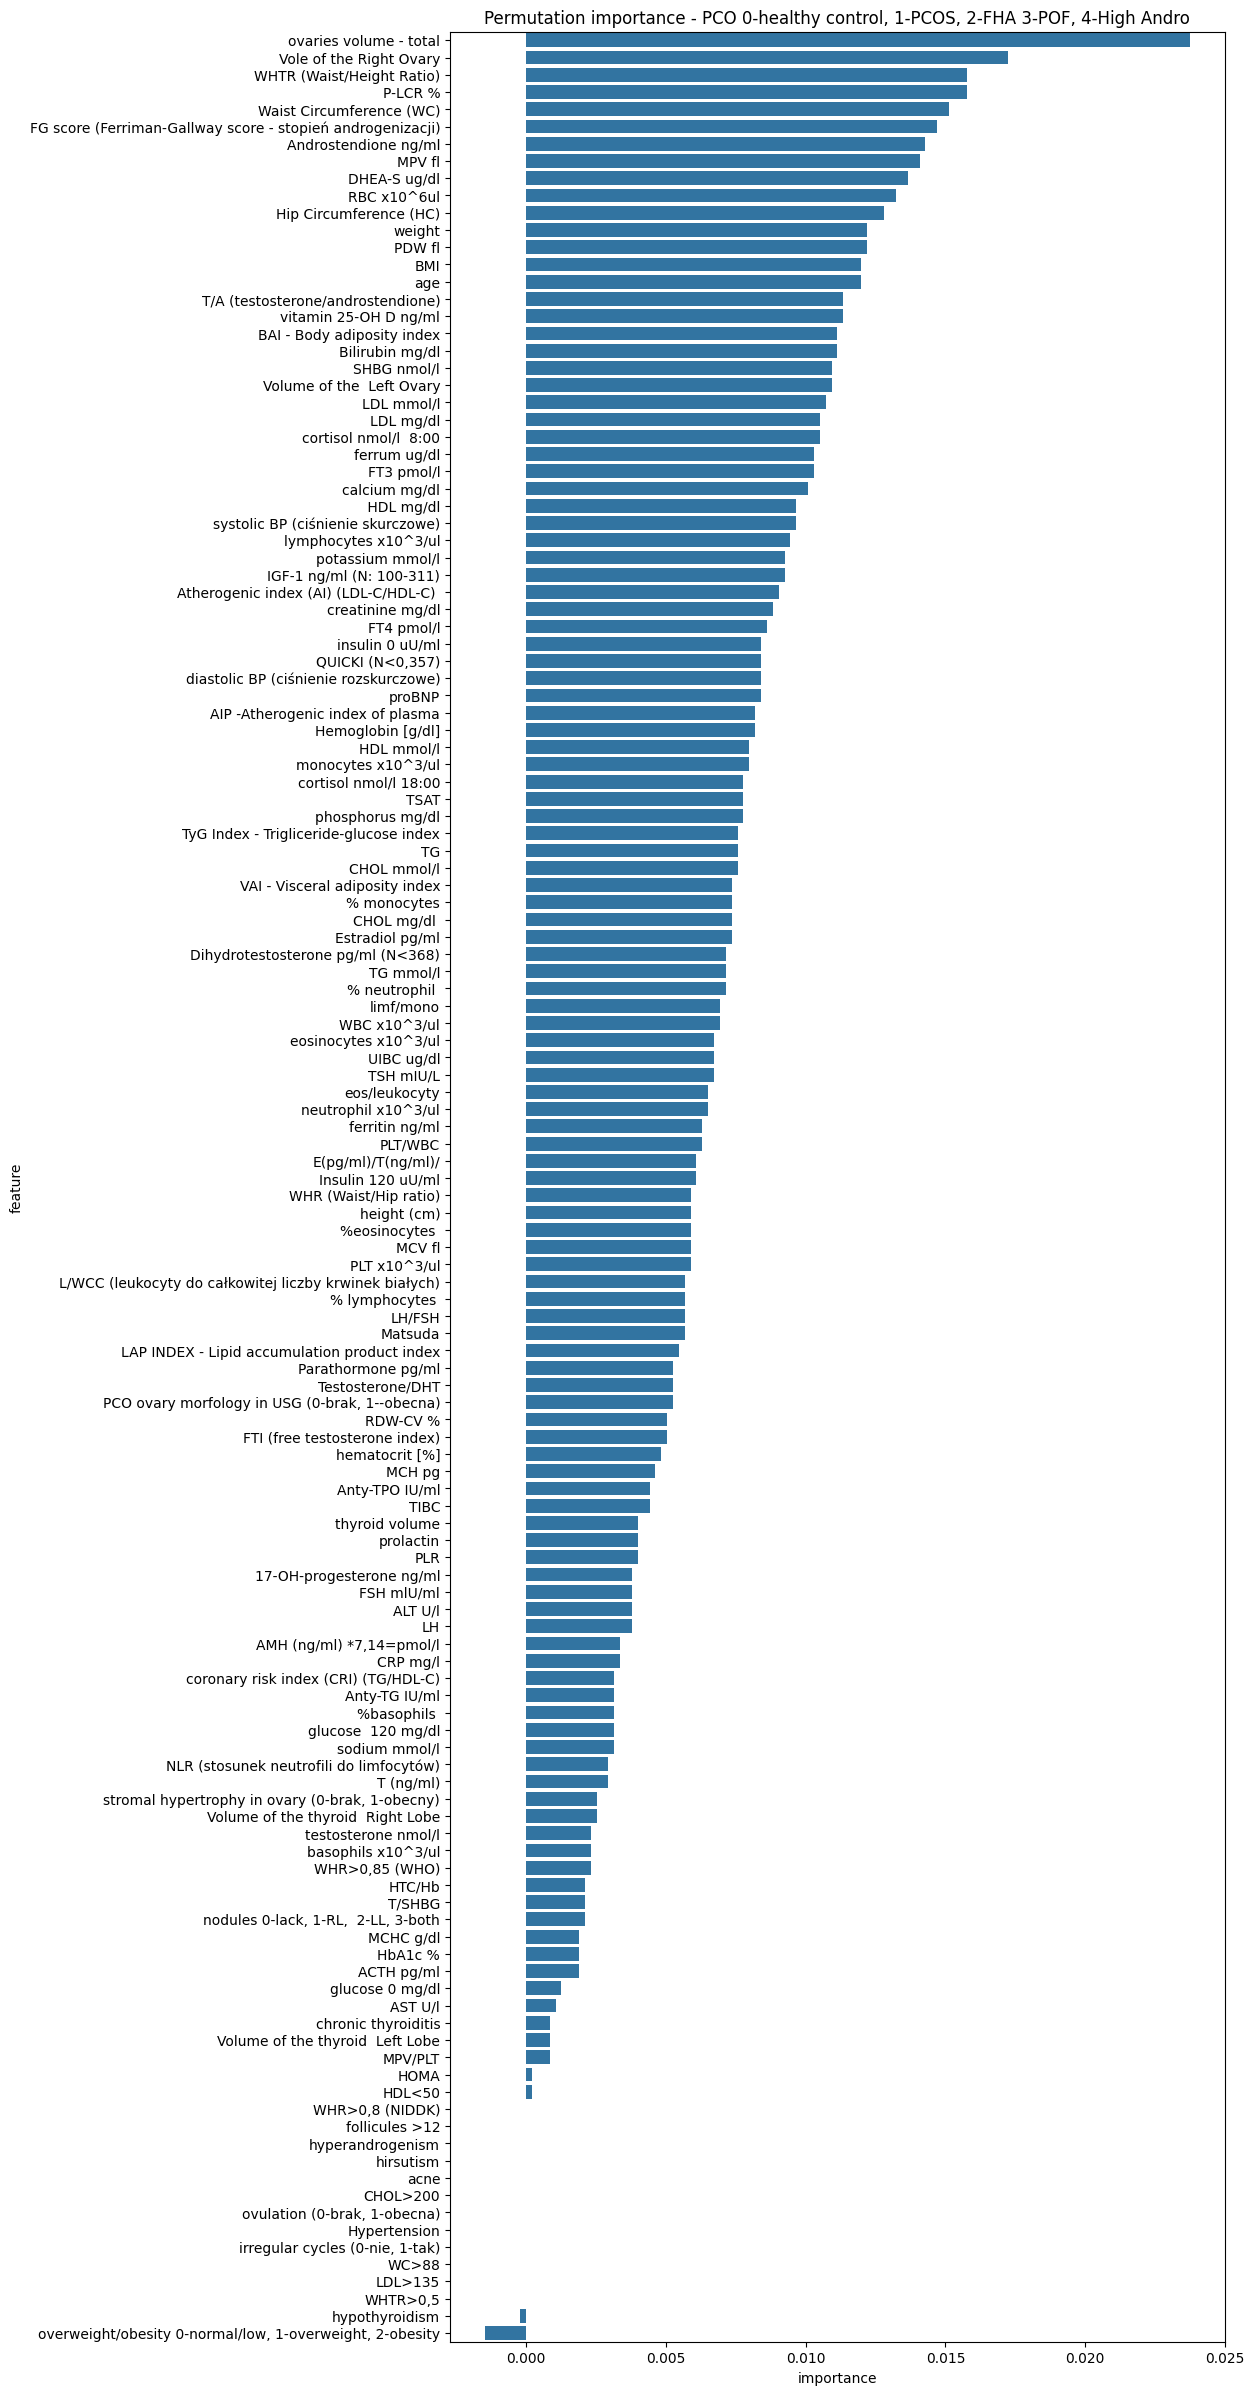

Actually selected 82 features


In [40]:
lasso_model = RandomForestClassifier(min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample')

selected_features_permutation_importance = get_permutation_importance(X_train, y_train, lasso_model, continuous_preprocessor, categorical_preprocessor, PCO)
selected_features_permutation_importance = selected_features_permutation_importance[selected_features_permutation_importance['importance'] > 0.005]
selected_features_map['permutation_importance'] = list(selected_features_permutation_importance['feature'].values)
print(f'Actually selected {len(selected_features_map['permutation_importance'])} features')
# selected_features_permutation_importance

In [41]:
selected_features_map

{'chi_2': ['PCO ovary morfology in USG (0-brak, 1--obecna)',
  'ovulation (0-brak, 1-obecna)',
  'follicules >12',
  'Hypertension',
  'stromal hypertrophy in ovary (0-brak, 1-obecny)',
  'chronic thyroiditis',
  'WC>88',
  'ovaries volume - total',
  'hypothyroidism',
  'WHR>0,85 (WHO)',
  'Vole of the Right Ovary',
  'acne',
  'Volume of the  Left Ovary',
  'WHTR>0,5',
  'Estradiol pg/ml',
  'hyperandrogenism',
  'CHOL>200',
  'E(pg/ml)/T(ng/ml)/',
  'DHEA-S ug/dl',
  'hirsutism',
  'irregular cycles (0-nie, 1-tak)',
  'Androstendione ng/ml',
  'HDL<50',
  'vitamin 25-OH D ng/ml',
  'Anty-TG IU/ml',
  'prolactin',
  'T/SHBG',
  'P-LCR %'],
 'mutual_info': ['PCO ovary morfology in USG (0-brak, 1--obecna)',
  'ovaries volume - total',
  'Vole of the Right Ovary',
  'TSAT',
  'glucose  120 mg/dl',
  'Volume of the  Left Ovary',
  ' HDL mg/dl',
  'IGF-1 ng/ml (N: 100-311)',
  'phosphorus mg/dl',
  'vitamin 25-OH D ng/ml',
  'creatinine mg/dl',
  'Hypertension',
  'UIBC ug/dl',
  'ferrum 

In [42]:
intersection_all_sets = set(selected_features_map[next(iter(selected_features_map))])

for key, items in selected_features_map.items():
    intersection_all_sets.intersection_update(items)


intersection_all_sets = list(intersection_all_sets)
print(len(intersection_all_sets))
print(intersection_all_sets)

pd.DataFrame(intersection_all_sets)

8
['Volume of the  Left Ovary', 'PCO ovary morfology in USG (0-brak, 1--obecna)', 'E(pg/ml)/T(ng/ml)/', 'ovaries volume - total', 'Androstendione ng/ml', 'vitamin 25-OH D ng/ml', 'P-LCR %', 'Vole of the Right Ovary']


0
0                       Volume of the  Left Ovary
1  PCO ovary morfology in USG (0-brak, 1--obecna)
2                              E(pg/ml)/T(ng/ml)/
3                          ovaries volume - total
4                            Androstendione ng/ml
5                           vitamin 25-OH D ng/ml
6                                         P-LCR %
7                         Vole of the Right Ovary

In [8]:
intersection_all_sets = ['Volume of the  Left Ovary', 'PCO ovary morfology in USG (0-brak, 1--obecna)', 'E(pg/ml)/T(ng/ml)/', 'ovaries volume - total', 'Androstendione ng/ml', 'vitamin 25-OH D ng/ml', 'P-LCR %', 'Vole of the Right Ovary']

In [22]:
union_all_sets = set(selected_features_map[next(iter(selected_features_map))]) 

for key, items in selected_features_map.items():
    union_all_sets.update(items)
    

union_all_sets = list(union_all_sets)
print(len(union_all_sets))
print(union_all_sets)

108
['thyroid volume', 'MCH pg', 'DHEA-S ug/dl', 'hematocrit [%]', 'FT3 pmol/l', 'PLR', 'AST U/l', 'VAI - Visceral adiposity index', 'Anty-TG IU/ml', 'CRP mg/l', 'WBC x10^3/ul', 'glucose 0 mg/dl', 'systolic BP (ciśnienie skurczowe)', 'cortisol nmol/l  8:00', 'TSH mIU/L', 'Insulin 120 uU/ml', 'WHR>0,85 (WHO)', 'HDL mmol/l', 'TSAT', '% lymphocytes ', 'MCV fl', 'T/A (testosterone/androstendione)', 'Volume of the thyroid  Right Lobe', 'FG score (Ferriman-Gallway score - stopień androgenizacji)', 'NLR (stosunek neutrofili do limfocytów)', 'Vole of the Right Ovary', 'T/SHBG', 'CHOL>200', 'ovaries volume - total', 'eosinocytes x10^3/ul', 'chronic thyroiditis', 'Volume of the thyroid  Left Lobe', 'nodules 0-lack, 1-RL,  2-LL, 3-both', 'Androstendione ng/ml', 'proBNP', 'Hemoglobin [g/dl]', 'WHR (Waist/Hip ratio)', 'Parathormone pg/ml', 'ALT U/l', 'Hypertension', 'ferrum ug/dl', 'LDL mmol/l', 'glucose  120 mg/dl', 'Bilirubin mg/dl', 'follicules >12', 'WHTR>0,5', 'UIBC ug/dl', 'E(pg/ml)/T(ng/ml)/

## Test the narrowed down feature space

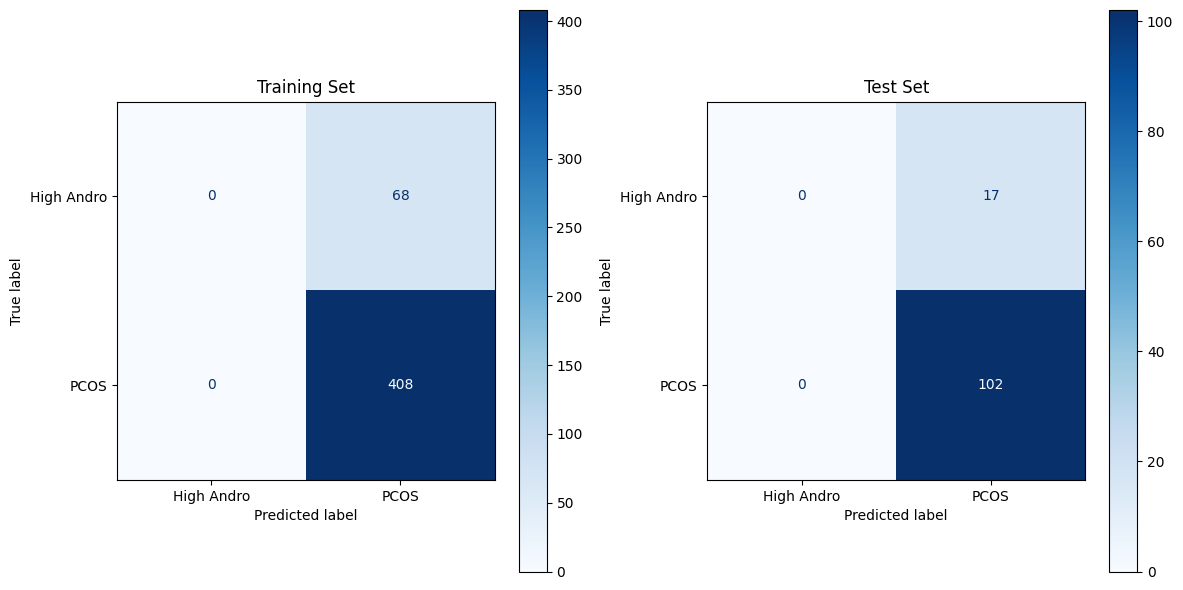

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and be

Training set
              precision    recall  f1-score   support

  High Andro       0.00      0.00      0.00        68
        PCOS       0.86      1.00      0.92       408

    accuracy                           0.86       476
   macro avg       0.43      0.50      0.46       476
weighted avg       0.73      0.86      0.79       476

Test set
              precision    recall  f1-score   support

  High Andro       0.00      0.00      0.00        17
        PCOS       0.86      1.00      0.92       102

    accuracy                           0.86       119
   macro avg       0.43      0.50      0.46       119
weighted avg       0.73      0.86      0.79       119



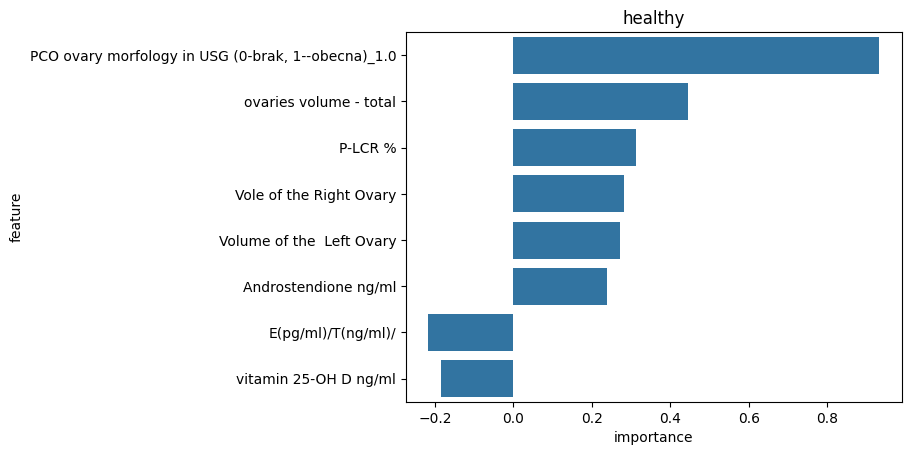

In [9]:
model_lr = LogisticRegression(C=0.1, max_iter=100000, n_jobs=-1)

feature_importnces_lr, pipeline_tlr = validate_model_classification(model_lr, PCO, CLASS_NAMES, X_train[intersection_all_sets], y_train, X_test[intersection_all_sets], y_test, continuous_preprocessor, categorical_preprocessor, get_feature_importance_logistic_regressison)

In [13]:
model_tree = DecisionTreeClassifier()
param_grid_tree = {
    'model__criterion': ['gini'],
    'model__max_depth': [3, 4, 5],
    'model__min_samples_split': [7, 10],
    'model__min_samples_leaf': [7, 10],
    'model__class_weight': [None],
}

tree_h_scores = hyperparameter_tuning_general(X_train[intersection_all_sets], y_train, PCO, model_tree, continuous_preprocessor_tree, categorical_preprocessor, param_grid_tree, scoring_metric=gmean_scorer)

# tree_h_scores = hyperparameter_tuning_general(X_train, y_train, PCO, model_tree, continuous_preprocessor_tree, categorical_preprocessor, param_grid_tree, scoring_metric='f1_weighted')
tree_h_scores.sort_values(by='mean_test_score', ascending=False)

Fitting 15 folds for each of 12 candidates, totalling 180 fits
Best parameters: {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 7, 'model__min_samples_split': 7}
Best score (make_scorer(geometric_mean_score, response_method='predict')): 0.5284304312261724


params  mean_train_score  mean_test_score
8     {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 7, 'model__min_samples_split': 7}          0.674897         0.528430
4     {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 7, 'model__min_samples_split': 7}          0.668892         0.525854
11  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 10, 'model__min_samples_split': 10}          0.652901         0.525324
6    {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 10, 'model__min_samples_split': 7}          0.653367         0.524818
5    {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 7, 'model__min_samples_split': 10}          0.662379         0.518164
7   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 10, 'model__min_samples_split': 10}          0.654142         0.518096
10   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 10, 'model__min_samples_split': 7}          0.653743         0.507557
9    {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 7, 'model__min_samples_split': 10}          0.674010         0.503985
0     {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 7, 'model__min_samples_split': 7}          0.610515         0.501188
1    {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 7, 'model__min_samples_split': 10}          0.610515         0.500811
2    {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 10, 'model__min_samples_split': 7}          0.575132         0.457143
3   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 10, 'model__min_samples_split': 10}          0.575132         0.457143

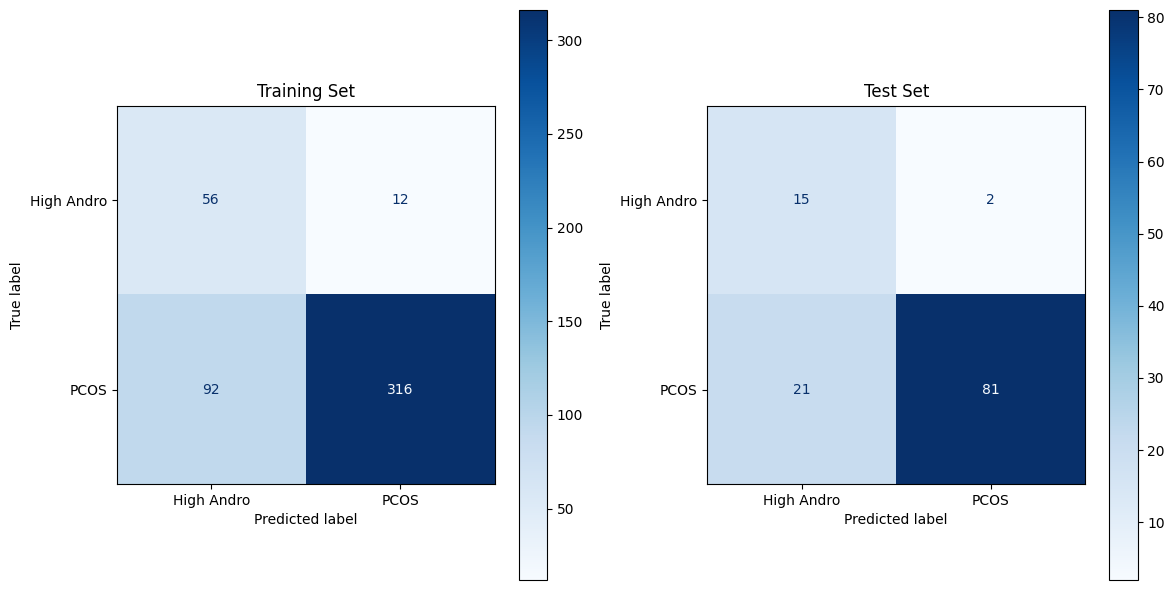

Training set
              precision    recall  f1-score   support

  High Andro       0.38      0.82      0.52        68
        PCOS       0.96      0.77      0.86       408

    accuracy                           0.78       476
   macro avg       0.67      0.80      0.69       476
weighted avg       0.88      0.78      0.81       476

Test set
              precision    recall  f1-score   support

  High Andro       0.42      0.88      0.57        17
        PCOS       0.98      0.79      0.88       102

    accuracy                           0.81       119
   macro avg       0.70      0.84      0.72       119
weighted avg       0.90      0.81      0.83       119



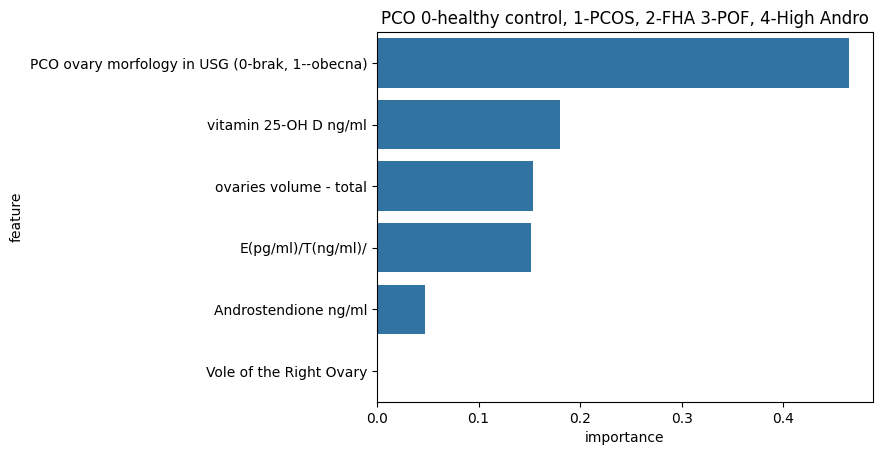

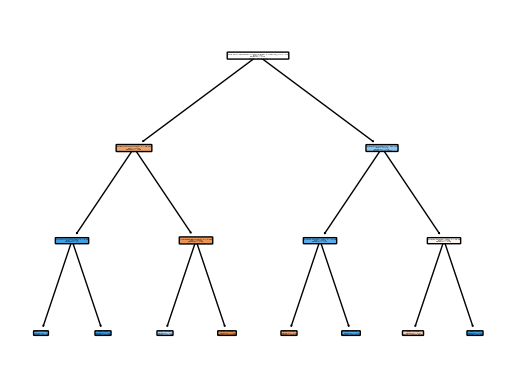

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


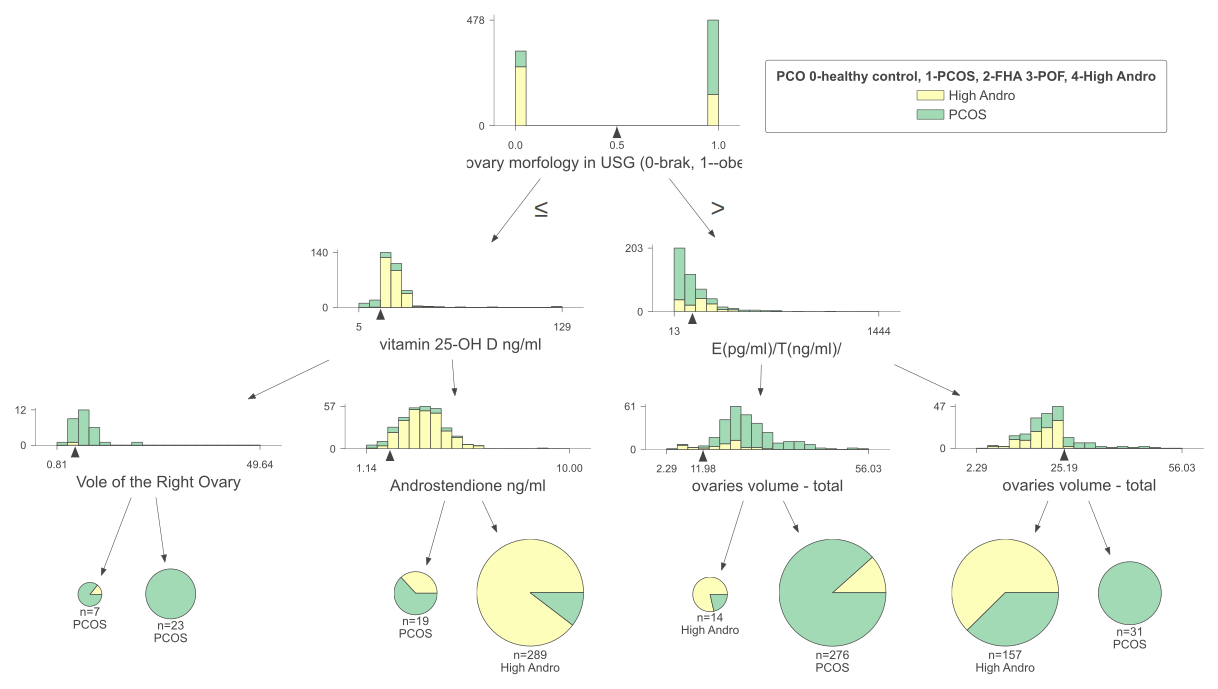

In [15]:
#  SMOTE
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=7, min_samples_split=7, class_weight=None)

feature_importnces_tree, pipeline_tree = validate_model_classification_smote(model_tree, PCO, CLASS_NAMES, X_train[intersection_all_sets], y_train, X_test[intersection_all_sets], y_test, continuous_imputer_tree_pipeline, categorical_imputer_pipeline, get_feature_importance_tree)

plot_fancy_tree_smote(pipeline_tree, X_train, y_train, PCO, show_artificial_data=True, class_names=CLASS_NAMES)

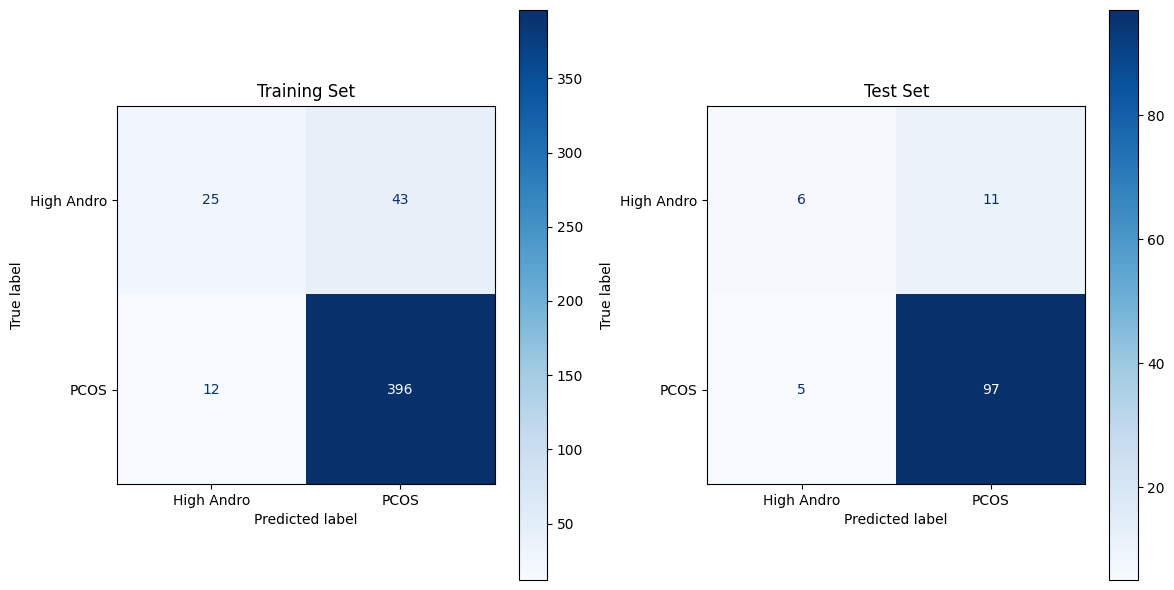

Training set
              precision    recall  f1-score   support

  High Andro       0.68      0.37      0.48        68
        PCOS       0.90      0.97      0.94       408

    accuracy                           0.88       476
   macro avg       0.79      0.67      0.71       476
weighted avg       0.87      0.88      0.87       476

Test set
              precision    recall  f1-score   support

  High Andro       0.55      0.35      0.43        17
        PCOS       0.90      0.95      0.92       102

    accuracy                           0.87       119
   macro avg       0.72      0.65      0.68       119
weighted avg       0.85      0.87      0.85       119



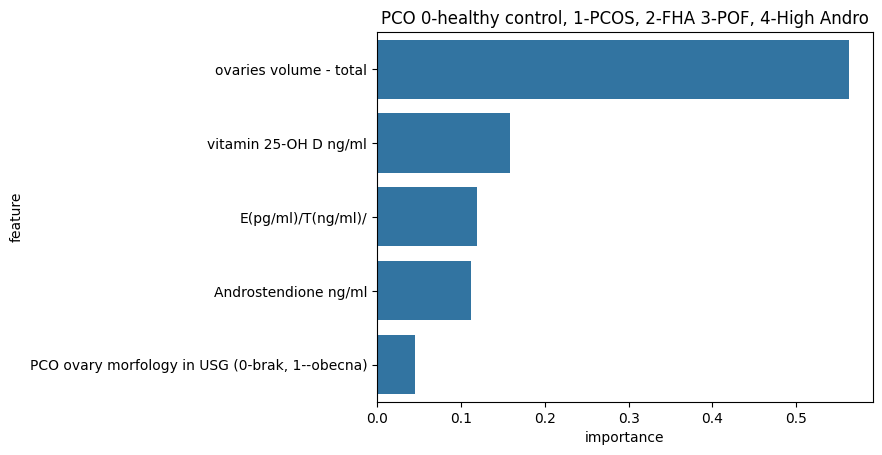

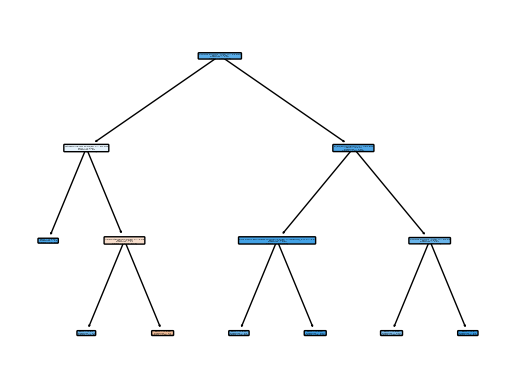

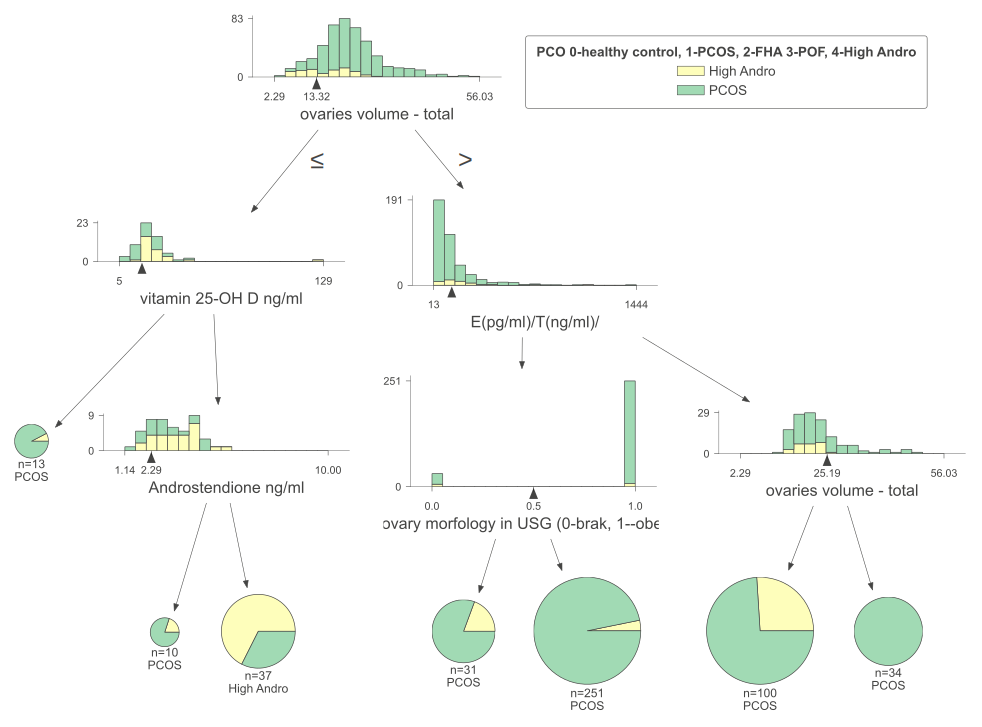

In [18]:
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=7, min_samples_split=7, class_weight=None)

feature_importnces_tree, pipeline_tree = validate_model_classification(model_tree, PCO, CLASS_NAMES, X_train[intersection_all_sets], y_train, X_test[intersection_all_sets], y_test, continuous_preprocessor_tree, categorical_preprocessor, get_feature_importance_tree)

plot_fancy_tree(pipeline_tree, X_train, y_train, PCO, CLASS_NAMES)

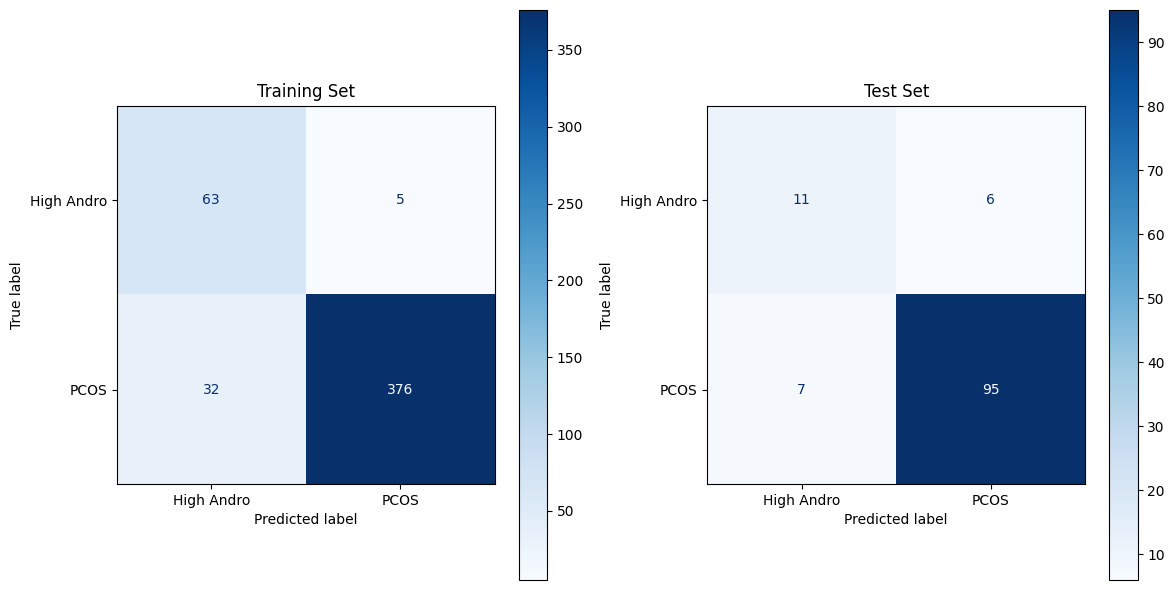

Training set
              precision    recall  f1-score   support

  High Andro       0.66      0.93      0.77        68
        PCOS       0.99      0.92      0.95       408

    accuracy                           0.92       476
   macro avg       0.83      0.92      0.86       476
weighted avg       0.94      0.92      0.93       476

Test set
              precision    recall  f1-score   support

  High Andro       0.61      0.65      0.63        17
        PCOS       0.94      0.93      0.94       102

    accuracy                           0.89       119
   macro avg       0.78      0.79      0.78       119
weighted avg       0.89      0.89      0.89       119



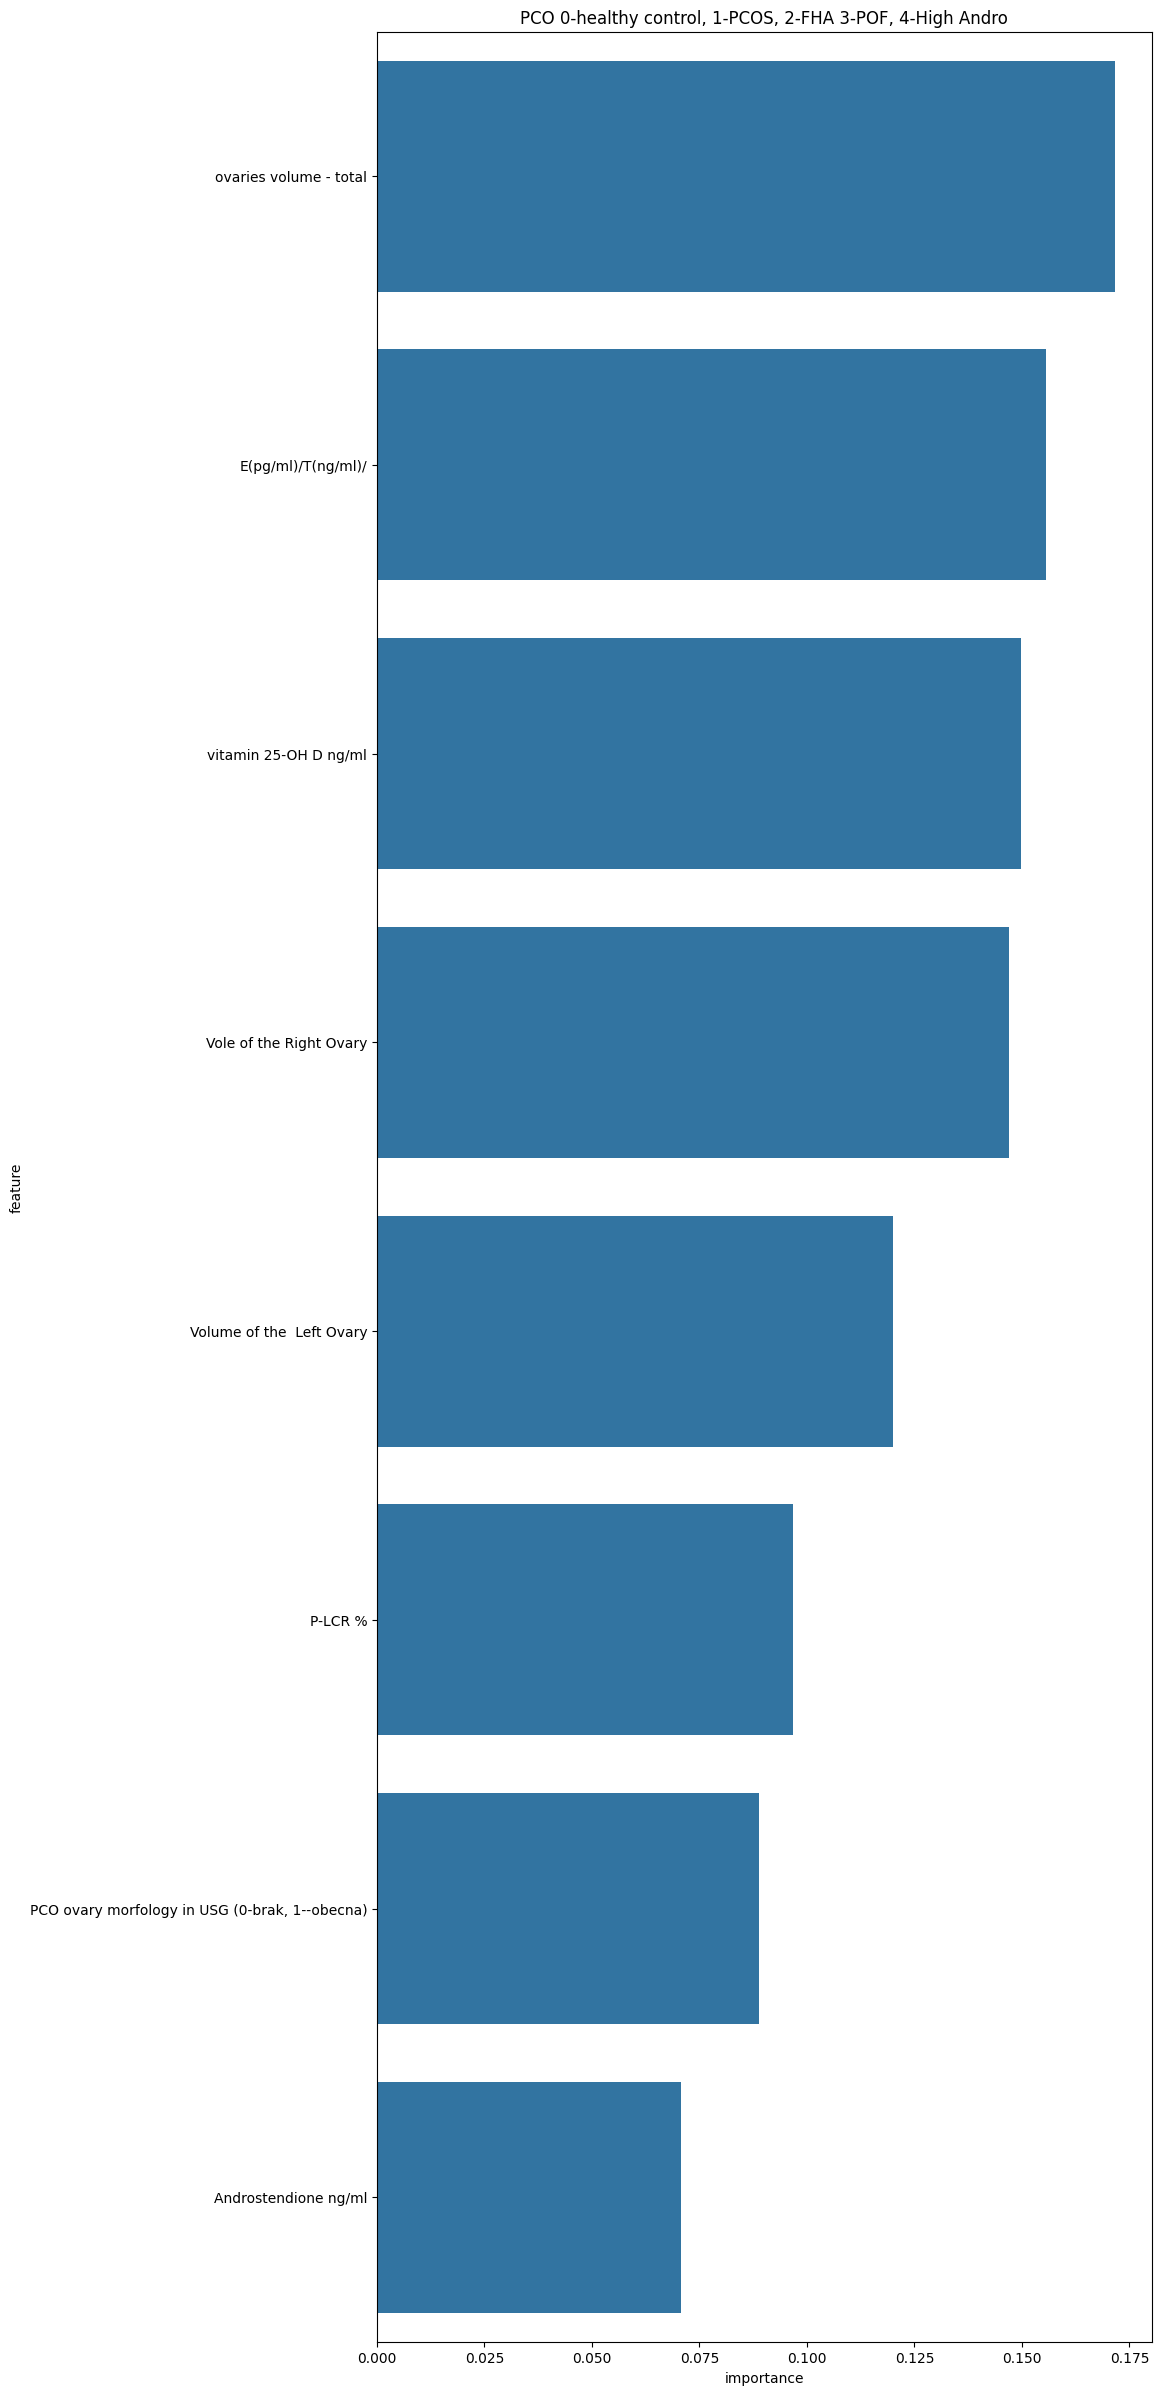

In [19]:
model_rf = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=None, max_features='sqrt', min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample', random_state=72)

feature_importnces_rf, pipeline_rf = validate_model_classification(model_rf, PCO, CLASS_NAMES, X_train[intersection_all_sets], y_train, X_test[intersection_all_sets], y_test, continuous_preprocessor_tree, categorical_preprocessor, get_feature_importance_rf)